## Neelanjan - Lead sourceing case study_1


In [43]:
# importing libs :

import pandas as pd, numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix


from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## 1. Data reading & understanding :

In [44]:
df_leadscore = pd.read_csv(r'D:\Data Science\Machine Learning\Education Company Case study\Lead Scoring Assignment\Leads.csv')
df_leadscore.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [45]:
## Data inspection :


In [46]:
df_leadscore.shape

(9240, 37)

In [47]:
df_leadscore.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [48]:
df_leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2. Data Peparation 

In [49]:
## 2a. Cleaning & mnipulation :

In [50]:
# Checking null values (%)

df_leadscore.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [51]:
# Lets get the list of teh col having missig values over 45% 
c1 = df_leadscore.isnull().mean()*100 > 45
df_leadscore.columns[c1==True]

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [52]:
# Lets drop the cols having >45% missing values as those will not significantly contribute to our analisis
missing_45p = ['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score']
df_leadscore1 = df_leadscore.drop(labels=missing_45p,axis=1)
df_leadscore1.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
# Getting a new data frame with missing values < 45% 
df_leadscore1.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 32 columns]

In [54]:
df_leadscore1.shape

(9240, 32)

In [55]:
df_leadscore1.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [56]:
## Confirm that all in cols of our deta frame contain <45% of null values - so, we are Good to proceed further 

In [57]:
# Getting the columns which are not very much important for our analysis
print(df_leadscore1["Lead Number"].value_counts)
print('\n *************************************************** \n')
print(df_leadscore1["Prospect ID"].value_counts)
print('\n *************************************************** \n')

<bound method IndexOpsMixin.value_counts of 0       660737
1       660728
2       660727
3       660719
4       660681
         ...  
9235    579564
9236    579546
9237    579545
9238    579538
9239    579533
Name: Lead Number, Length: 9240, dtype: int64>

 *************************************************** 

<bound method IndexOpsMixin.value_counts of 0       7927b2df-8bba-4d29-b9a2-b6e0beafe620
1       2a272436-5132-4136-86fa-dcc88c88f482
2       8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3       0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4       3256f628-e534-4826-9d63-4a8b88782852
                        ...                 
9235    19d6451e-fcd6-407c-b83b-48e1af805ea9
9236    82a7005b-7196-4d56-95ce-a79f937a158d
9237    aac550fe-a586-452d-8d3c-f1b62c94e02c
9238    5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9
9239    571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Name: Prospect ID, Length: 9240, dtype: object>

 *************************************************** 



* Looks like Lead number and Prospect ID have all unique values which are not very much useful for our data analysis,so we can drop them.

In [58]:
df_leadscore2 = df_leadscore1.drop(["Lead Number" , "Prospect ID"] , axis= 1)
df_leadscore2.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Through Recommendations  \
0  Page Visited on Website     NaN  ...                      No   
1             Email Opened   India  ...                      No   
2             Email Opened   India  ...                      No   
3              Unreachable   India  ...                      No   
4        Converted to Lead   India  ...                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City I agree to pay the amount through cheque  \
0  Select                                       No   
1  Select                                       No   
2  Mumbai                                       No   
3  Mumbai                                       No   
4  Mumbai                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 30 columns]

In [59]:
df_leadscore2.shape

(9240, 30)

In [60]:
# Lets check the null value again :
df_leadscore2.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

** cool - we got the expected outcomes 

## Handeling "Select" Label in catagorical cols :

In [61]:
# converting select labeles to "NaN"

df_leadscore2 = df_leadscore2.replace('Select', np.nan)

In [62]:
# re-Checking the null values %
df_leadscore2.isnull().mean().sort_values(ascending=False)*100


How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Through Recommendations                           0.000000
I agree to pay the amount through cheque          0.0000

We see that for some columns we have High Percentage of Missing Values. We can drop the columns with missing values greater than 45% .

In [63]:
# Lets get the list of teh col having missig values over 45% 
c2 = df_leadscore2.isnull().mean()*100 > 45
df_leadscore2.columns[c2==True]

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [64]:
# Lets drop the cols having >45% missing values as those will not significantly contribute to our analisis
missing_45p = ['How did you hear about X Education', 'Lead Profile']
df_leadscore3 = df_leadscore2.drop(labels=missing_45p,axis=1)
df_leadscore3.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [65]:
df_leadscore3.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Digital Advertisement  \
0  Page Visited on Website     NaN  ...                    No   
1             Email Opened   India  ...                    No   
2             Email Opened   India  ...                    No   
3              Unreachable   India  ...                    No   
4        Converted to Lead   India  ...                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No     NaN                                       No   
1                        No     NaN                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 28 columns]

In [66]:
df_leadscore3.isnull().mean().sort_values(ascending= False)*100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [67]:
# Separatimg catagorical & numerical cols : Logic = if more than 30 unique items are present in a column, 
# will be conceder as a count col , else it is catagorical 

cont_cols=[]
cat_cols=[]
for i in df_leadscore3.columns:
    if df_leadscore3[i].nunique()>30:
        print(i,df_leadscore3[i].nunique(),  "----cont_cols")
        cont_cols.append(i)
    else:
        print(i,df_leadscore3[i].nunique(),  "----cat_cols")
        cat_cols.append(i)


Lead Origin 5 ----cat_cols
Lead Source 21 ----cat_cols
Do Not Email 2 ----cat_cols
Do Not Call 2 ----cat_cols
Converted 2 ----cat_cols
TotalVisits 41 ----cont_cols
Total Time Spent on Website 1731 ----cont_cols
Page Views Per Visit 114 ----cont_cols
Last Activity 17 ----cat_cols
Country 38 ----cont_cols
Specialization 18 ----cat_cols
What is your current occupation 6 ----cat_cols
What matters most to you in choosing a course 3 ----cat_cols
Search 2 ----cat_cols
Magazine 1 ----cat_cols
Newspaper Article 2 ----cat_cols
X Education Forums 2 ----cat_cols
Newspaper 2 ----cat_cols
Digital Advertisement 2 ----cat_cols
Through Recommendations 2 ----cat_cols
Receive More Updates About Our Courses 1 ----cat_cols
Tags 26 ----cat_cols
Update me on Supply Chain Content 1 ----cat_cols
Get updates on DM Content 1 ----cat_cols
City 6 ----cat_cols
I agree to pay the amount through cheque 1 ----cat_cols
A free copy of Mastering The Interview 2 ----cat_cols
Last Notable Activity 16 ----cat_cols


In [68]:
df_leadscore3.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [69]:
## CHENGING 'country' from cont-col to cat_col :by observing the col values 

In [70]:
cont_cols=[ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cat_cols= ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Last Activity', 'Specialization',
       'What is your current occupation','Country',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [71]:
for i in cat_cols:
    print(i)
    print()
    print(df_leadscore3[i].value_counts())
    print()
    print("percentage",100*df_leadscore3[i].value_counts(normalize=True))
    print()


Lead Origin

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

percentage Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Lead Source

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name

In [72]:
# Replacing the null values in categorical columns by mode of that respective the colmun
for i in cat_cols:
    if df_leadscore3[i].isnull().sum()>0:
        value=df_leadscore3[i].mode()[0]
        df_leadscore3[i]=df_leadscore3[i].fillna(value)


In [73]:
# Replacing the null values in continuous columns by median of that respective the colmun
for i in cont_cols:
    if df_leadscore3[i].isnull().sum()>0:   
        value=df_leadscore3[i].median()
        df_leadscore3[i]=df_leadscore3[i].fillna(value)


In [74]:
#now check all the null values are replaced or not
df_leadscore3.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

** Awasome - all null values are eleminated !
However, we still find, in some of the coloums, only 1 major values find, we can also drop them as they are not contributing much affect in analisis 
Those cols are Tags,Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque.

In [75]:
# Droping these cols :
df_leadscore4 = df_leadscore3.drop(['Country','What matters most to you in choosing a course','Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper',
                  'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content', 
                  'I agree to pay the amount through cheque','Tags'], axis=1)
df_leadscore4.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website       Finance Management   
1             Email Opened       Finance Management   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead       Finance Management   

  What is your current occupation    City  \
0                      Unemployed  Mumbai   
1                      Unemployed  Mumbai   
2                         Student  Mumbai   
3                      Unemployed  Mumbai   
4                      Unemployed  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [76]:
df_leadscore4.shape

(9240, 13)

## converting some binary variables (Yes/No) to 0/1

In [77]:
print(df_leadscore4["Do Not Email"].value_counts())
print(df_leadscore4["A free copy of Mastering The Interview"].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [78]:
# Replacing the values of yes =1 and No= 0
df_leadscore4["Do Not Email"].replace(to_replace = "No" , value = 0 , inplace = True)
df_leadscore4["Do Not Email"].replace(to_replace = "Yes" , value = 1 , inplace = True)
df_leadscore4["A free copy of Mastering The Interview"].replace(to_replace = "No" , value = 0 , inplace = True)
df_leadscore4["A free copy of Mastering The Interview"].replace(to_replace = "Yes" , value = 1 , inplace = True)

In [79]:
# checking the value of the data
df_leadscore4.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website       Finance Management   
1             Email Opened       Finance Management   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead       Finance Management   

  What is your current occupation    City  \
0                      Unemployed  Mumbai   
1                      Unemployed  Mumbai   
2                         Student  Mumbai   
3                      Unemployed  Mumbai   
4                      Unemployed  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

# 2b. Outlier Analysis

In [80]:
# Checking the data at 25%,50%,75%,90%,95% and above
df_leadscore4.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9240.000000  9240.000000                  9240.000000   
mean       0.079437     0.385390     3.438636                   487.698268   
std        0.270435     0.486714     4.819024                   548.021466   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                    12.000000   
50%        0.000000     0.000000     3.000000                   248.000000   
75%        0.000000     1.000000     5.000000                   936.000000   
90%        0.000000     1.000000     7.000000                  1380.000000   
95%        1.000000     1.000000    10.000000                  1562.000000   
99%        1.000000     1.000000    17.000000                  1840.610000   
max        1.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9240.000000                             9240.000000  
mean               2.357440                                0.312554  
std                2.145781                                0.463559  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                9.000000                                1.000000  
max               55.000000                                1.000000

* we can see clerar outlayers in TotalVisits and Page Views Per Visit columns, which need to be treated 

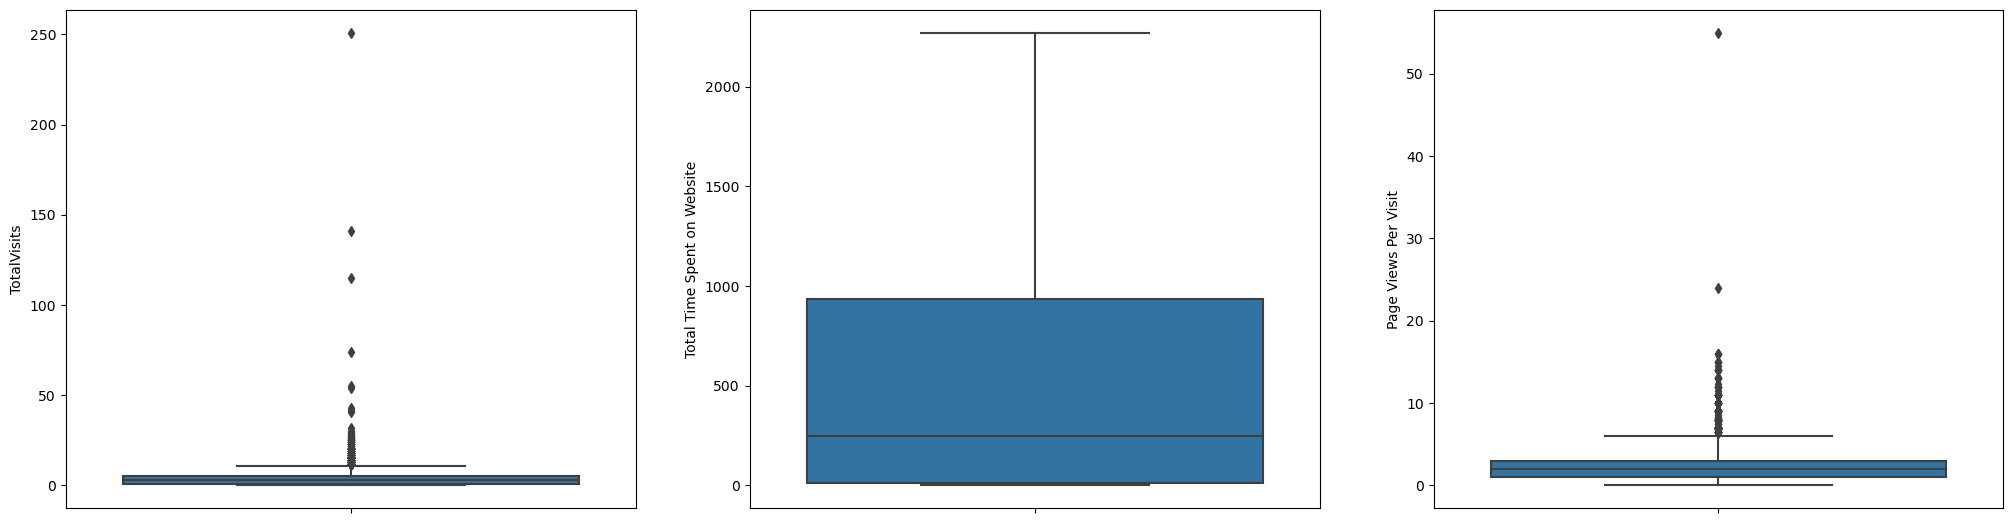

In [81]:
# Check the outliers for all the numeric columns

plt.figure(figsize=(25, 22))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = df_leadscore4)
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = df_leadscore4)
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = df_leadscore4)
plt.show()

In [82]:
# Removing values beyond 99% for Total Visits

total_visits = df_leadscore4['TotalVisits'].quantile(0.99)
df_leadscore4 = df_leadscore4[df_leadscore4["TotalVisits"] < total_visits]
df_leadscore4["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [83]:
# Removing values beyond 99% for page Views Per Visit

page_visits = df_leadscore4['Page Views Per Visit'].quantile(0.99)
df_leadscore4 = df_leadscore4[df_leadscore4["Page Views Per Visit"] < page_visits]
df_leadscore4["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [84]:
# Checking data again at 25%,50%,75%,90%,95% and above after removing values at 99 percentile
df_leadscore4.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9029.000000  9029.000000  9029.000000                  9029.000000   
mean       0.077749     0.385092     3.087164                   483.133016   
std        0.267792     0.486644     2.801244                   547.420675   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                     7.000000   
50%        0.000000     0.000000     3.000000                   245.000000   
75%        0.000000     1.000000     4.000000                   929.000000   
90%        0.000000     1.000000     7.000000                  1378.000000   
95%        1.000000     1.000000     8.000000                  1558.000000   
99%        1.000000     1.000000    13.000000                  1839.720000   
max        1.000000     1.000000    16.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9029.000000                             9029.000000  
mean               2.226383                                0.305682  
std                1.823395                                0.460721  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                7.000000                                1.000000  
max                8.000000                                1.000000

In [85]:
# Finding the percentage of data retained

percent_data = round(100*(len(df_leadscore4)/9240),2)
print(percent_data)

97.72


* good to see that over all > 97% data is retained which is good to analisis 

## 3. Data Visualization :

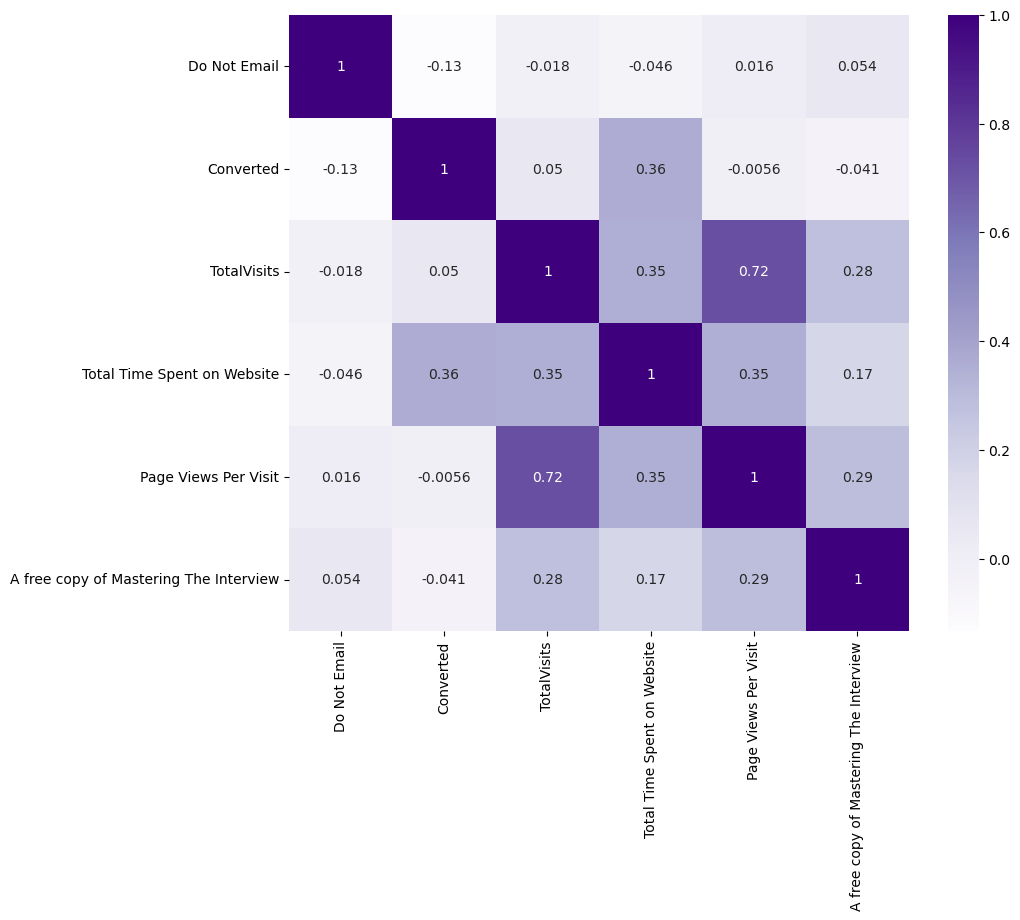

In [86]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(df_leadscore4.corr(), cmap="Purples", annot=True)
plt.show()

In [87]:
df_leadscore4.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

From the heat map, we do understand that, our continious cols are :

[ 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
        'A free copy of Mastering The Interview']

So other cols are catagorical,
we already identified few as catagorical cols & named as cat_col 
others, can be named as cat_col1

In [88]:
cat_col1 = ['Lead Origin', 'Lead Source','Last Activity', 'What is your current occupation']

(0, 'Lead Origin')
(1, 'Lead Source')
(2, 'Last Activity')
(3, 'What is your current occupation')


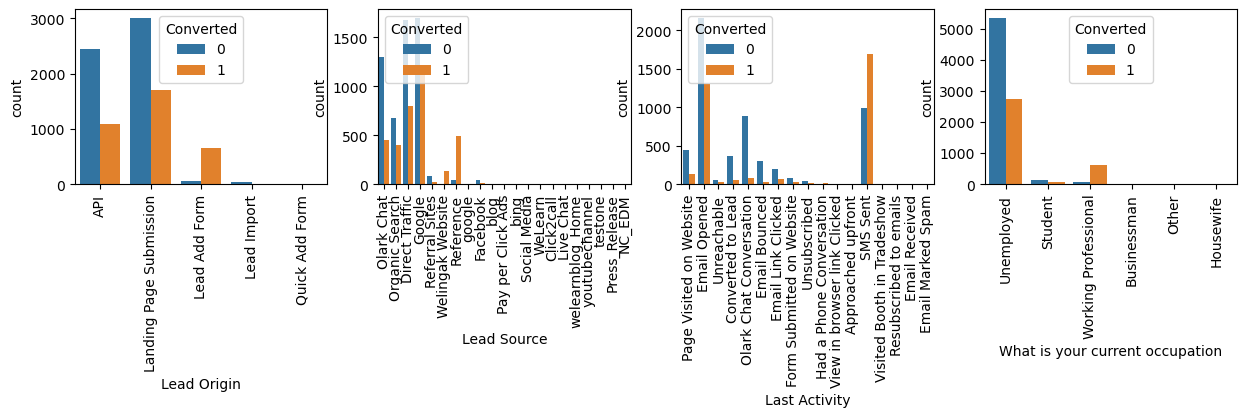

In [89]:
plt.figure(figsize = (15, 5))
for i in enumerate(cat_col1):
    plt.subplot(2,4,i[0]+1)
    print(i)
    sns.countplot(i[1], hue = 'Converted', data = df_leadscore4)
    plt.xticks(rotation = 90)

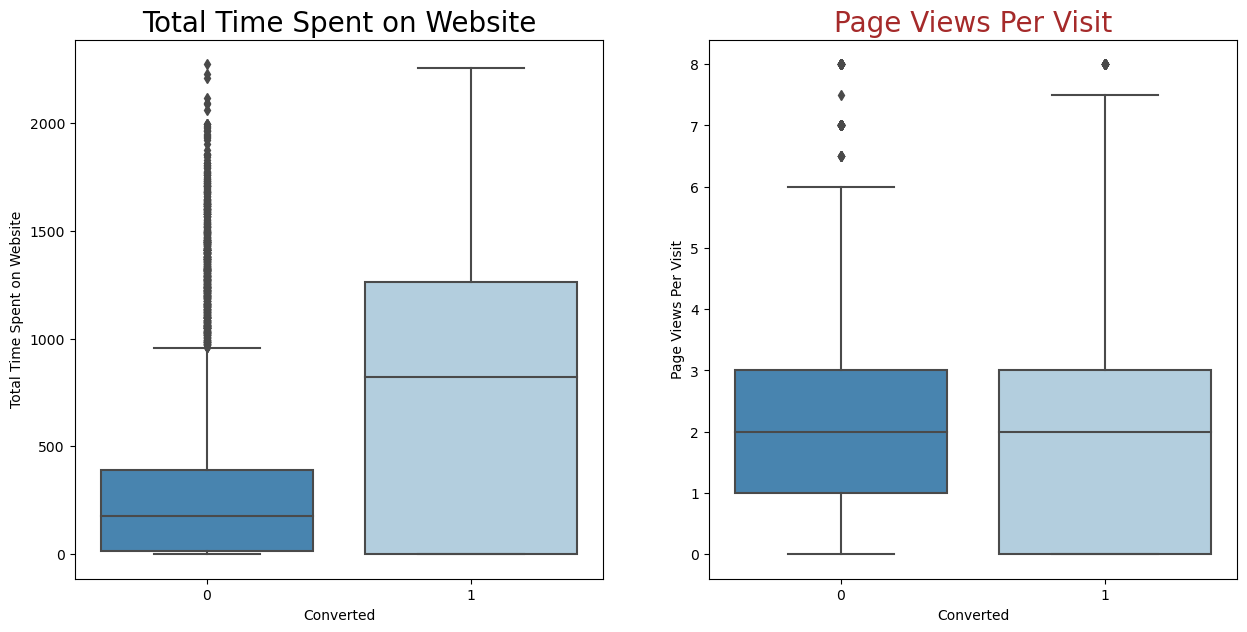

In [90]:
# Checking outliers for converted cols 

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(df_leadscore4["Converted"] , df_leadscore4["Total Time Spent on Website"] , palette = "Blues_r")
plt.title("Total Time Spent on Website", fontdict={'fontsize': 20, 'color' : 'black'})

plt.subplot(1,2,2)
sns.boxplot(df_leadscore4["Converted"] , df_leadscore4["Page Views Per Visit"] , palette = "Blues_r")
plt.title("Page Views Per Visit", fontdict={'fontsize': 20, 'color' : 'brown'})

plt.show()

# Univariate Analysis - Categorical Variables

In [91]:
# Checking catagorical cols :

print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Specialization', 'What is your current occupation', 'Country', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


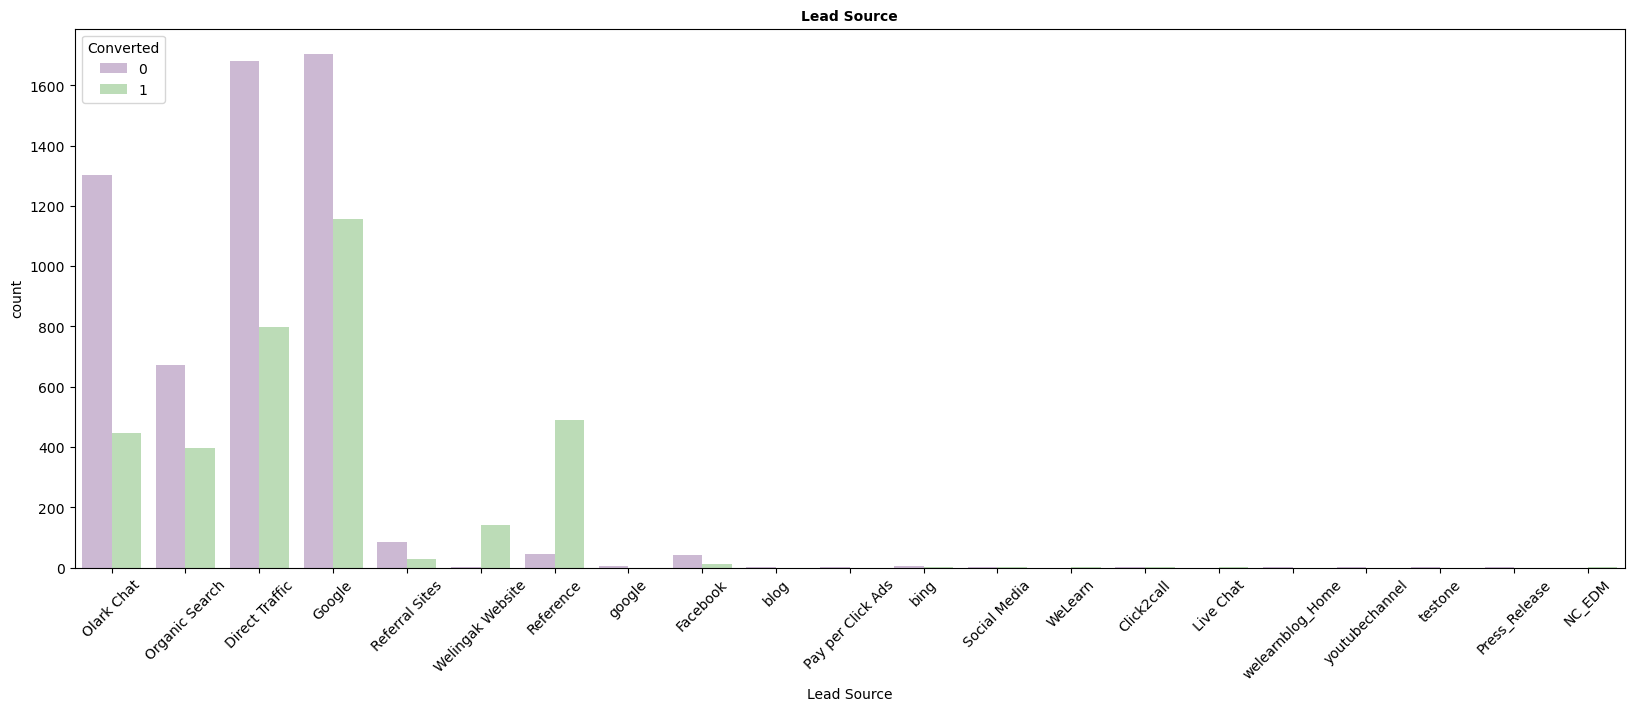

In [92]:
#1. for col "Lead Source"

plt.figure(figsize = (20,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(df_leadscore4['Lead Source'], hue = df_leadscore4.Converted, palette = "PRGn")
plt.title('Lead Source', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

Remarks : Google has heighest convertion rate followed by 'Reference','Direct Traffic', 'Olark Chat' ...

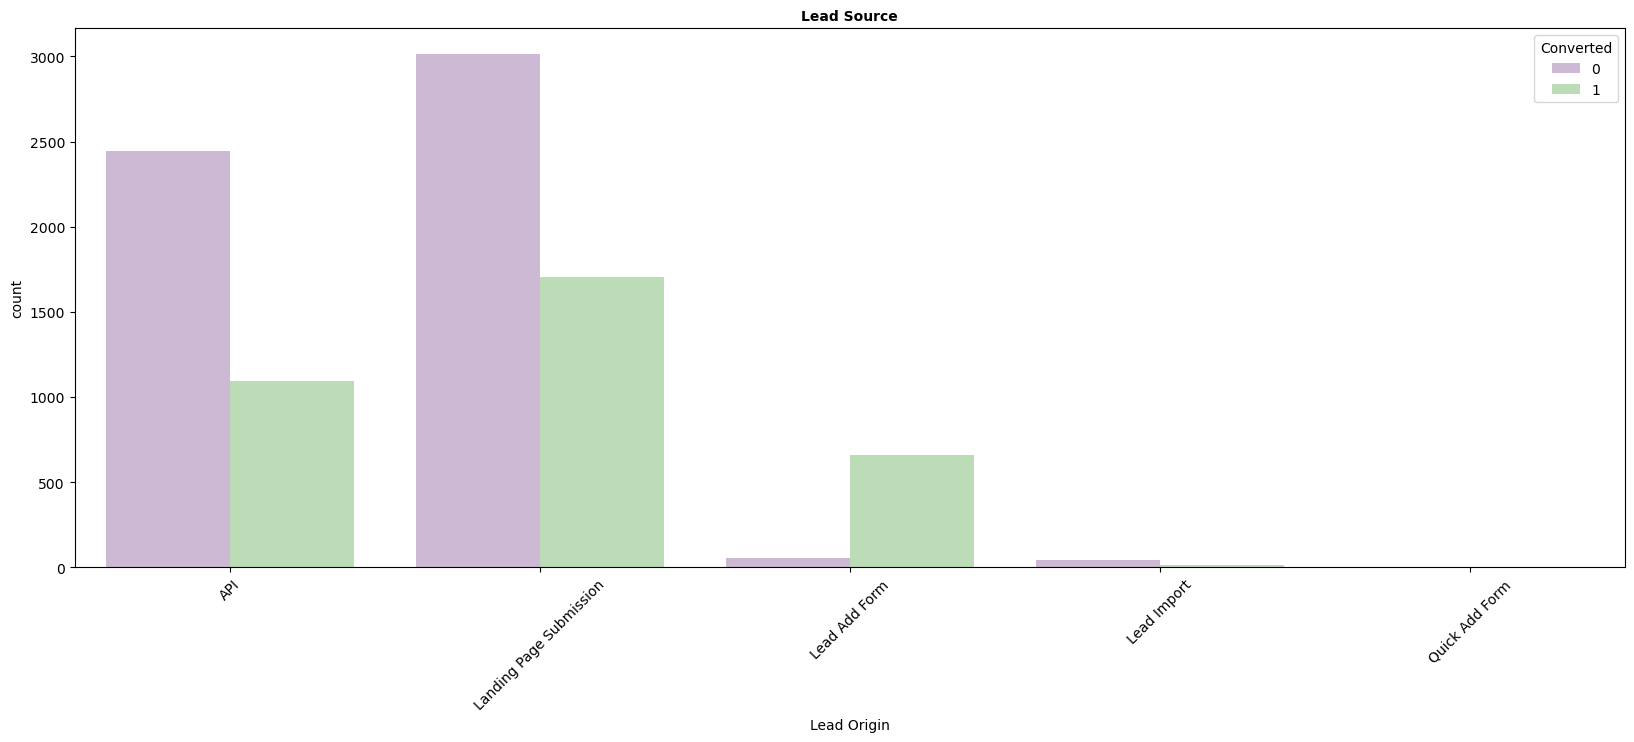

In [93]:
#2. for col 'Lead Origin'

plt.figure(figsize = (20,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(df_leadscore4['Lead Origin'], hue = df_leadscore4.Converted, palette = "PRGn")
plt.title('Lead Source', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

Remarks : more students are endrolled with 'Landing Page Submission'

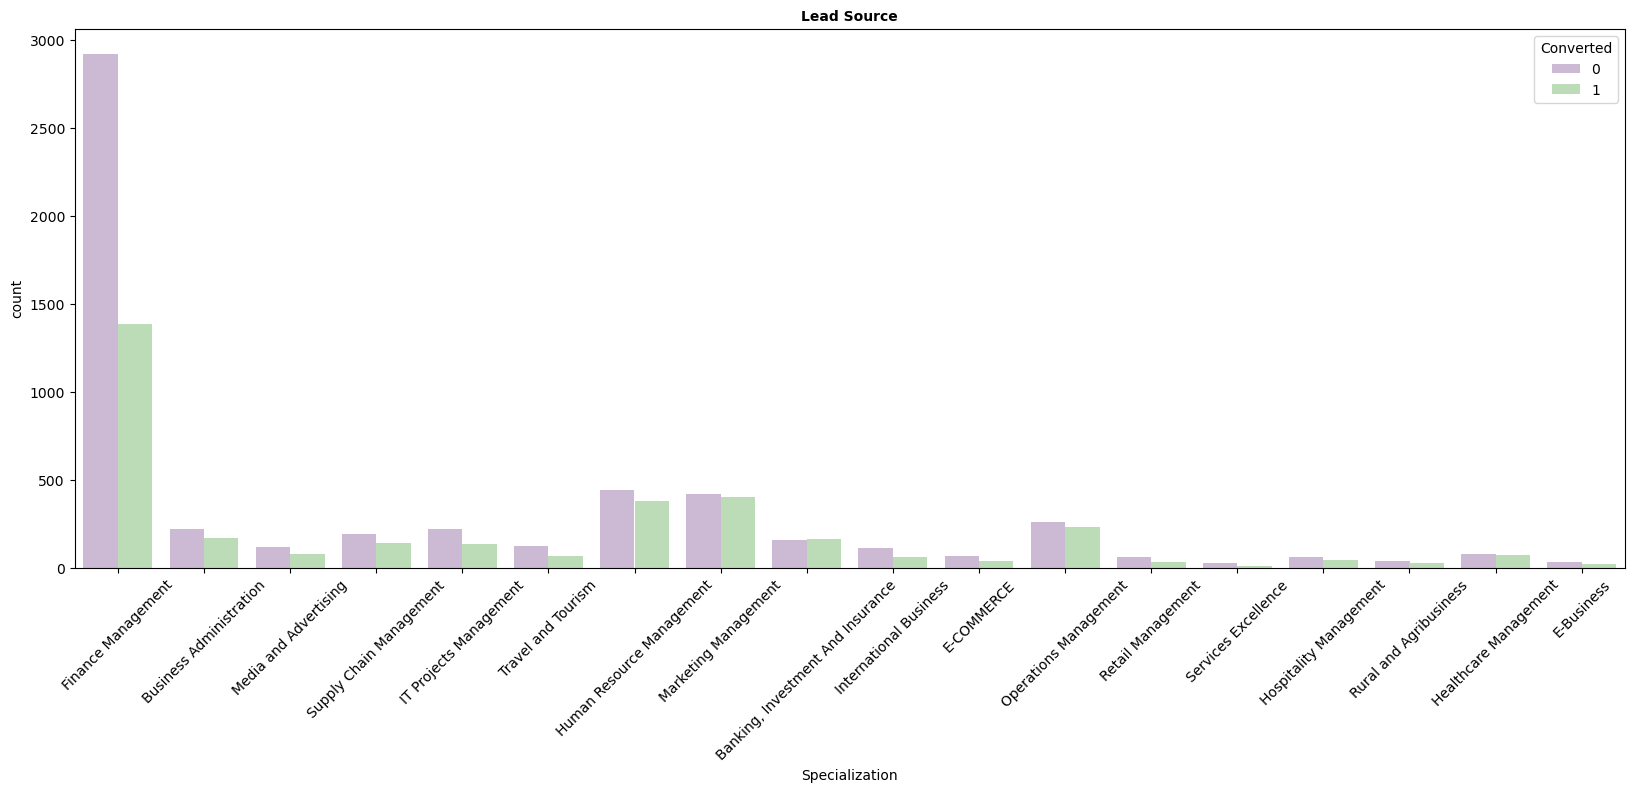

In [94]:
#3. for col 'Specialization'

plt.figure(figsize = (20,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(df_leadscore4['Specialization'], hue = df_leadscore4.Converted, palette = "PRGn")
plt.title('Lead Source', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

Remarks : 'Select'/ unknown cols have heighest lead rate 

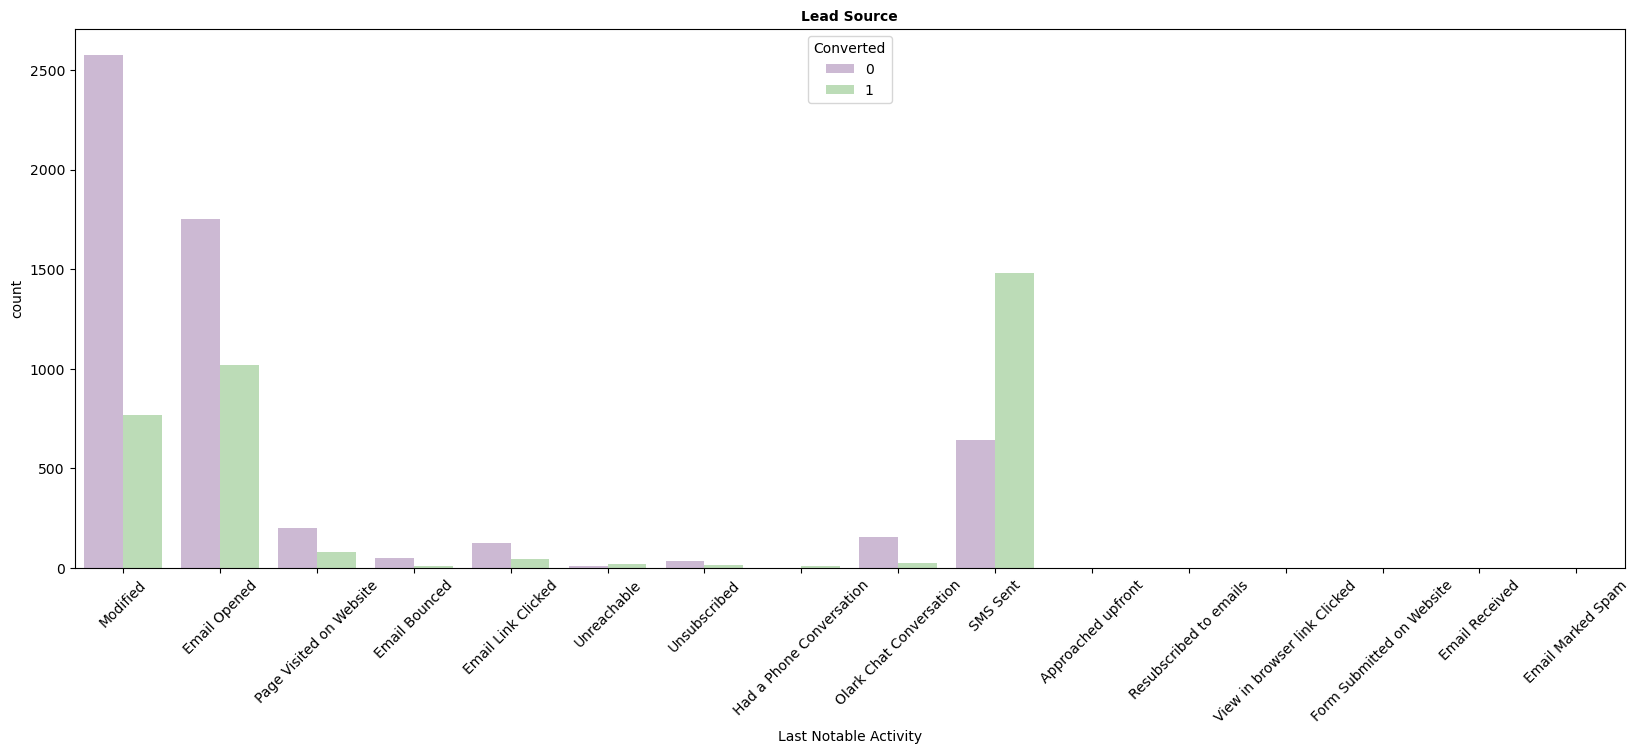

In [95]:
#3. for col 'Last Notable Activity'

plt.figure(figsize = (20,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(df_leadscore4['Last Notable Activity'], hue = df_leadscore4.Converted, palette = "PRGn")
plt.title('Lead Source', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

Remarks: Students with 'Last Notable Activity' as 'SMS sent' is with heighest convertion rate 

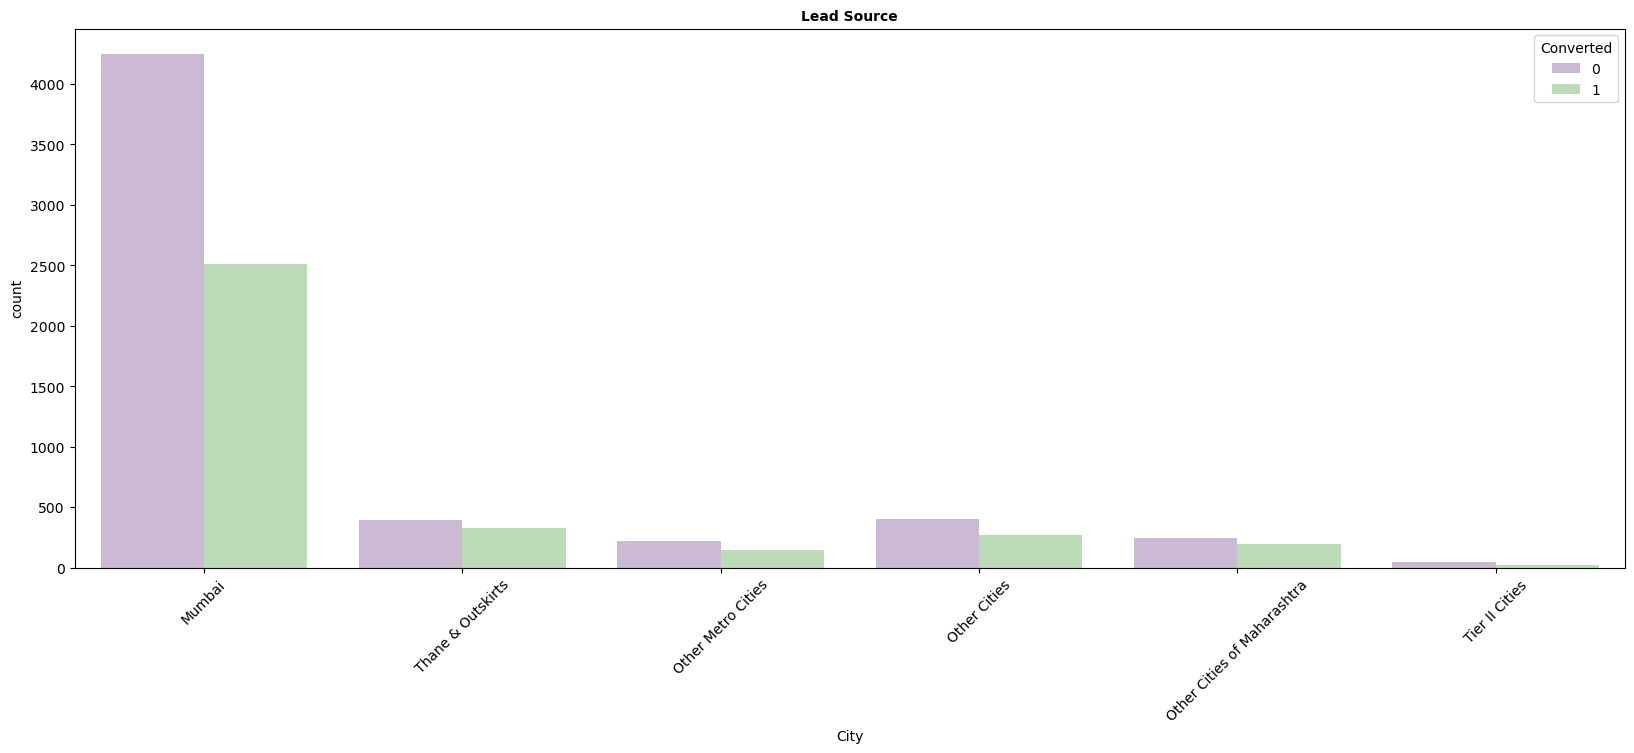

In [96]:
#5. for col 'City'

plt.figure(figsize = (20,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(df_leadscore4['City'], hue = df_leadscore4.Converted, palette = "PRGn")
plt.title('Lead Source', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

Remarks : Studens from Mumbai have best convertion rate 

# Checking Data Imbalance

In [97]:
# Checking Imbalance of Data Converted_0 == 0(Lead not Converted) test_data1== 1 (Lead Converted)

Converted_0=df_leadscore4[df_leadscore4["Converted"]==0]
Converted_1=df_leadscore4[df_leadscore4["Converted"]==1]
print("Shape of All not Converted Leads -", Converted_0.shape)
print("Shape of All Converted Lead -", Converted_1.shape)


Shape of All not Converted Leads - (5552, 13)
Shape of All Converted Lead - (3477, 13)


In [98]:
#Calculating Data Imbalance
imbalance= round((Converted_0.shape[0])/(Converted_1.shape[0]),3)
print("Imbalance Ratio is =",imbalance)


Imbalance Ratio is = 1.597


In [99]:
# ie, Converted_1 : Converted_0 = 1 : 1.597

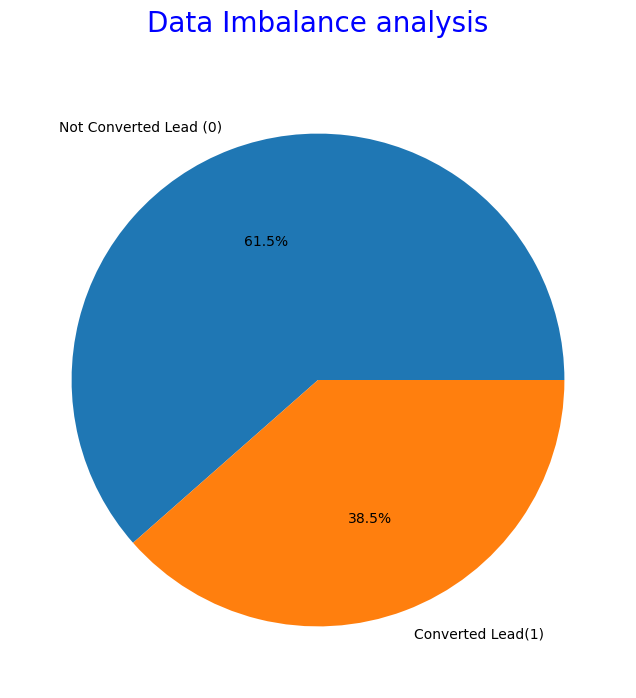

In [100]:
# Checking data distribution using Pie Chart
plt.figure(figsize=[8,8])
plt.pie([Converted_0.shape[0],Converted_1.shape[0]], labels=["Not Converted Lead (0)","Converted Lead(1)"], autopct='%1.1f%%')
plt.title("Data Imbalance analysis\n", fontdict={'fontsize':20,'fontweight':6,'color':'blue'})
plt.show()

## 4. Data Preparation for Modelling

-Dummy creation 

-Splitting the Data into Training and Testing Sets

-Scaling The Features


In [101]:
# 4a. Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy = pd.get_dummies(df_leadscore4[['Lead Origin', 'What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df_leadscore4 = pd.concat([df_leadscore4, dummy], axis=1)


In [103]:
# Dropping redandent cols 9as their dummy cols are included)
df_leadscore4=df_leadscore4.drop(['Lead Origin','What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity'],1)

In [104]:
# Checking current shape of data frame after dummy creation & redandent info elemination 
df_leadscore4.shape

(9029, 88)

In [105]:
df_leadscore4.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           0  ...   
3                        0                           0  ...   
4                        0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                

In [228]:
# Finding corelation matrix 
df_leadscore4.corr()


Do Not Email  Converted  TotalVisits  \
Do Not Email                     1.000000  -0.132879    -0.018485   
Converted                       -0.132879   1.000000     0.050210   
TotalVisits                     -0.018485   0.050210     1.000000   
Total Time Spent on Website     -0.045955   0.359630     0.353603   
Page Views Per Visit             0.016326  -0.005636     0.723836   
...                                   ...        ...          ...   
Tags_invalid number              0.047579  -0.072394     0.019842   
Tags_number not provided         0.059847  -0.043340     0.006261   
Tags_opp hangup                  0.002976  -0.036615     0.015151   
Tags_switched off                0.030469  -0.123647     0.035889   
Tags_wrong number given          0.056894  -0.055379     0.024509   

                             Total Time Spent on Website  \
Do Not Email                                   -0.045955   
Converted                                       0.359630   
TotalVisits                                     0.353603   
Total Time Spent on Website                     1.000000   
Page Views Per Visit                            0.350819   
...                                                  ...   
Tags_invalid number                            -0.026858   
Tags_number not provided                        0.002907   
Tags_opp hangup                                -0.008186   
Tags_switched off                              -0.028964   
Tags_wrong number given                        -0.014501   

                             Page Views Per Visit  \
Do Not Email                             0.016326   
Converted                               -0.005636   
TotalVisits                              0.723836   
Total Time Spent on Website              0.350819   
Page Views Per Visit                     1.000000   
...                                           ...   
Tags_invalid number                      0.027360   
Tags_number not provided                 0.013781   
Tags_opp hangup                          0.020997   
Tags_switched off                        0.055355   
Tags_wrong number given                  0.019094   

                             A free copy of Mastering The Interview  \
Do Not Email                                               0.054237   
Converted                                                 -0.040934   
TotalVisits                                                0.276740   
Total Time Spent on Website                                0.168090   
Page Views Per Visit                                       0.287694   
...                                                             ...   
Tags_invalid number                                        0.057838   
Tags_number not provided                                   0.025301   
Tags_opp hangup                                            0.027538   
Tags_switched off                                          0.044037   
Tags_wrong number given                                    0.029517   

                             Lead Origin_Landing Page Submission  \
Do Not Email                                            0.092188   
Converted                                              -0.051533   
TotalVisits                                             0.434574   
Total Time Spent on Website                             0.278164   
Page Views Per Visit                                    0.540923   
...                                                          ...   
Tags_invalid number                                     0.045464   
Tags_number not provided                                0.032070   
Tags_opp hangup                                         0.032200   
Tags_switched off                                       0.069987   
Tags_wrong number given                                 0.031898   

                             Lead Origin_Lead Add Form  \
Do Not Email                                 -0.019498   
Converted                                     0.325676  

In [106]:
# 4b. Splitting the data into training and Splitting sets

In [107]:
# Putting feature variable to X

X = df_leadscore4.drop(['Converted'], axis = 1)
X.head()


Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   What is your current occupation_Housewife  ...  \
0                                          0  ...   
1                                          0  ...   
2                                          0  ...   
3                                          0  ...   
4                                          0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                             

In [108]:
y = df_leadscore4['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [110]:
# Checking Shape of Train & Test
print("Train data shape :-",X_train.shape)
print("Test data shape :-",X_test.shape)

Train data shape :- (6320, 87)
Test data shape :- (2709, 87)


## Feature scaling using Minmax scaling

In [111]:
from sklearn.preprocessing import MinMaxScaler


In [112]:
# Scaling the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])
X_train.head()


Do Not Email  TotalVisits  Total Time Spent on Website  \
5493             0       0.1250                     0.042254   
8064             0       0.1875                     0.041373   
4716             1       0.1875                     0.099032   
9117             0       0.0000                     0.000000   
2402             0       0.3750                     0.381162   

      Page Views Per Visit  A free copy of Mastering The Interview  \
5493                 0.250                                       1   
8064                 0.375                                       0   
4716                 0.375                                       1   
9117                 0.000                                       0   
2402                 0.250                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5493                                    1                          0   
8064                                    0                          0   
4716                                    1                          0   
9117                                    0                          0   
2402                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
5493                        0                           0   
8064                        0                           0   
4716                        0                           0   
9117                        0                           0   
2402                        0                           0   

      What is your current occupation_Housewife  ...  \
5493                                          0  ...   
8064                                          0  ...   
4716                                          0  ...   
9117                                          0  ...   
2402                                          0  ...   

      Last Notable Activity_Form Submitted on Website  \
5493                                                0   
8064                                                0   
4716                                                0   
9117                                                0   
2402                                                0   

      Last Notable Activity_Had a Phone Conversation  \
5493                                               0   
8064                                               0   
4716                                               0   
9117                                               0   
2402                                               0   

      Last Notable Activity_Modified  \
5493                               1   
8064                               1   
4716                               1   
9117                               0   
2402                               0   

      Last Notable Activity_Olark Chat Conversation  \
5493                                              0   
8064                                              0   
4716                                              0   
9117                                              0   
2402                                              0   

      Last Notable Activity_Page Visited on Website  \
5493                                              0   
8064                                              0   
4716                                              0   
9117                                              0   
2402                                              0   

      Last Notable Activity_Resubscribed to emails  \
5493                                             0   
8064                                             0   
4716                                             0   
9117                                             0   
2402                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
5493                               0                                  0   
8064 

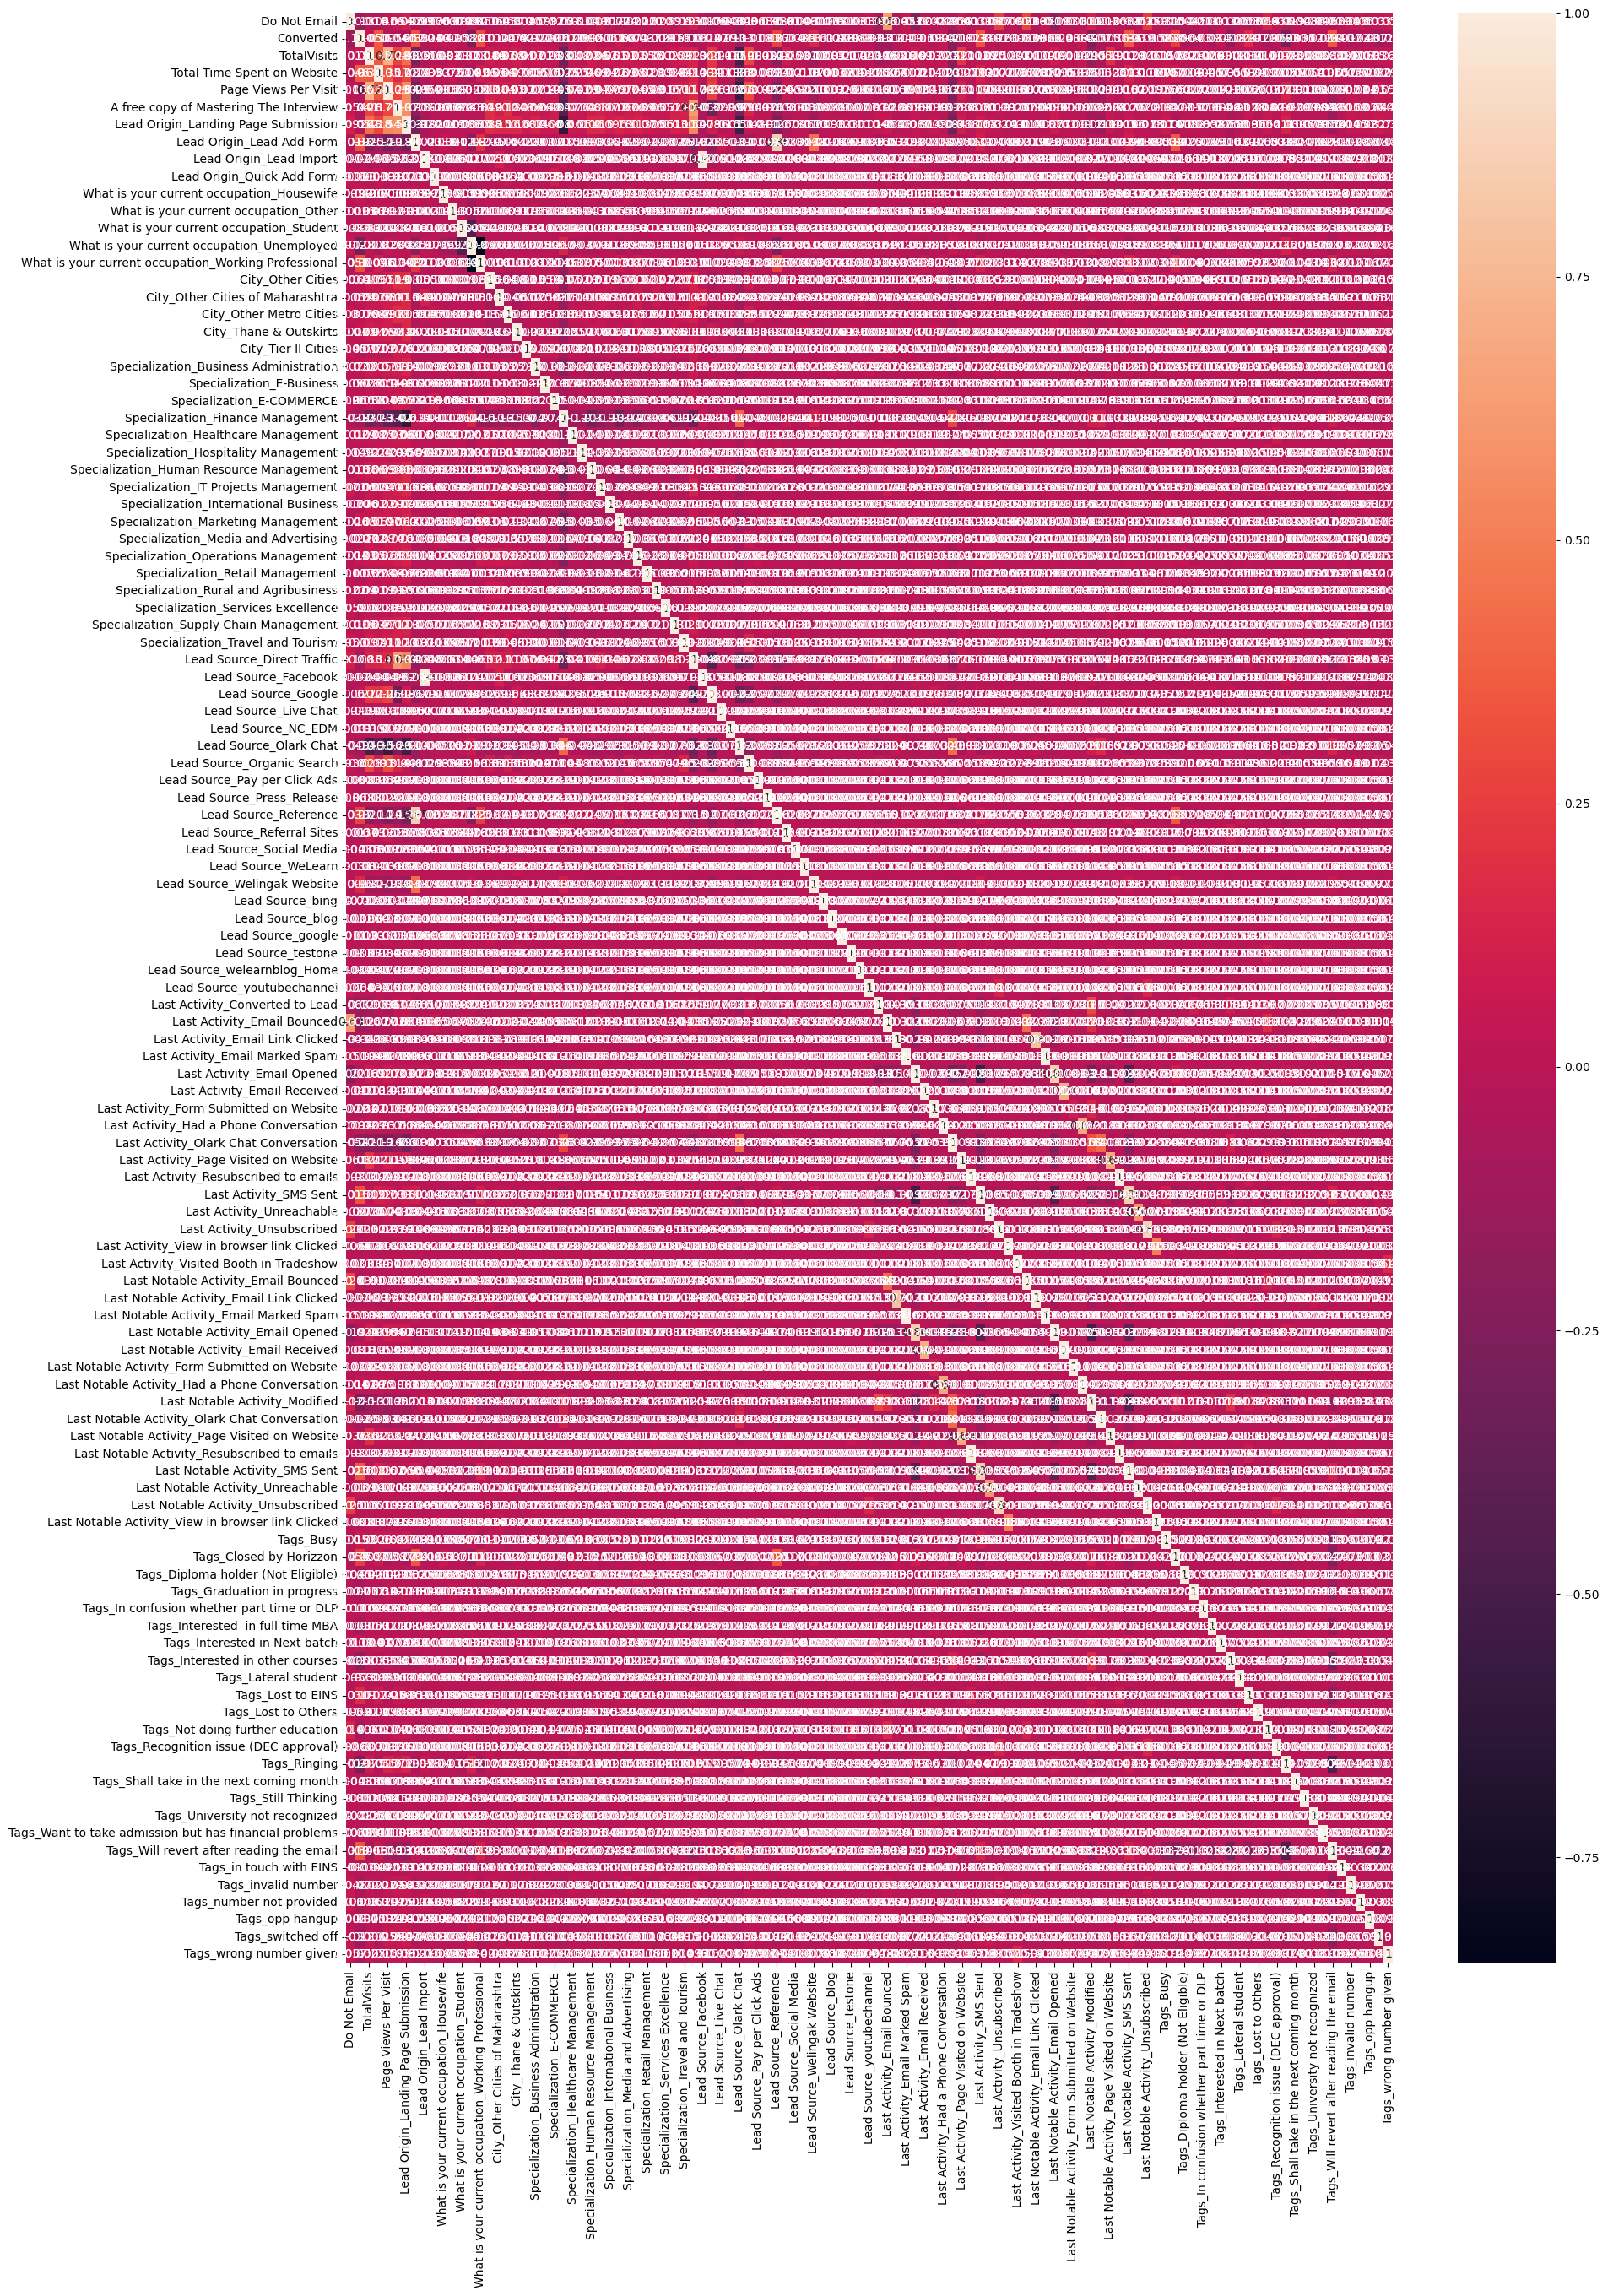

In [236]:
# Heatmap for correlation matrix
plt.figure(figsize=(20,30))
sns.heatmap(df_leadscore4.corr(), annot=True)
plt.show()

## 5.  Model Building

 - Course Tuning : top "n" feature selection (by RFE)
 - Fine tunning : 

In [113]:
import statsmodels.api as sm

In [114]:
# Logistic regression model with StatsModels
X_train=sm.add_constant(X_train)



In [157]:
#X_train = np.asarray(X_train, dtype=np.float64)

In [116]:
lgm1=sm.GLM(y_train,X_train, family=sm.families.Binomial())


In [117]:
lgm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Sep 2023   Deviance:                   1.3337e+05
Time:                        19:51:58   Pearson chi2:                 6.52e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 5.166e+15   5.26e+07   9.82e+07      0.000    5.17e+15    5.17e+15
Do Not Email                                         -6.696e+14   4.56e+06  -1.47e+08      0.000    -6.7e+14    -6.7e+14
TotalVisits                                           4.202e+14   7.55e+06   5.57e+07      0.000     4.2e+14     4.2e+14
Total Time Spent on Website                            2.88e+14   4.05e+06   7.12e+07      0.000    2.88e+14    2.88e+14
Page Views Per Visit                                  3.088e+14   6.35e+06   4.87e+07      0.000    3.09e+14    3.09e+14
A free copy of Mastering The Interview                 2.16e+13   2.71e+06   7.96e+06      0.000    2.16e+13    2.16e+13
Lead Origin_Landing Page Submission                   -2.52e+14   3.01e+06  -8.38e+07      0.000   -2.52e+14   -2.52e+14
Lead Origin_Lead Add Form                             1.029e+15   1.33e+07   7.76e+07      0.000    1.03e+15    1.03e+15
Lead Origin_Lead Import                               1.701e+14    4.8e+07   3.55e+06      0.000     1.7e+14     1.7e+14
Lead Origin_Quick Add Form                              14.4188    2.1e-07   6.88e+07      0.000      14.419      14.419
What is your current occupation_Housewife             1.274e+15   4.09e+07   3.12e+07      0.000    1.27e+15    1.27e+15
What is your current occupation_Other                 -1.29e+15    3.7e+07  -3.49e+07      0.000   -1.29e+15   -1.29e+15
What is your current occupation_Student              -4.855e+14   3.08e+07  -1.58e+07      0.000   -4.86e+14   -4.86e+14
What is your current occupation_Unemployed           -7.512e+14   3.02e+07  -2.48e+07      0.000   -7.51e+14   -7.51e+14
What is your current occupation_Working Professional  3.648e+14   3.04e+07    1.2e+07      0.000    3.65e+14    3.65e+14
City_Other Cities                                     1.621e+14   3.34e+06   4.86e+07      0.000    1.62e+14    1.62e+14
City_Other Cities of Maharashtra                      1.998e+14   4.09e+06   4.89e+07      0.000       2e+14       2e+14
City_Other Metro Cities                              -6.721e+13    4.5e+06  -1.49e+07      0.000   -6.72e+13   -6.72e+13
City_Thane & Outskirts                                9.212e+13   3.35e+06   2.75e+07      0.000    9.21e+13    9.21e+13
City_Tier II Cities                                  -1.615e+14      1e+07  -1.61e+07      0.000   -1.61e+14   -1.61e+14
Specialization_Business Administration               -8.083e+13    6.3e+06  -1.28e+07      0.000   -8.08e+13   -8.08e+13
Specialization_E-Business                            -1.645e+14   1.28e+07  -1.28e+07      0.000   -1.65e+14   -1.65e+14
Specialization_E-COMMERCE                            -7.62

Course selection : Now we are good to select the top "n" features 

In [118]:
## Top "n" selection using RFE 


#RFE - Selecting 15 Variables using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)


In [245]:
# Top 15 Features Selected by RFE for Modelling are:
rfe.support_


array([False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False])

In [119]:
# Check all cols - which are supporting RFE or Not based on their ranking 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 64),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 59),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Origin_Quick Add Form', False, 71),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 14),
 ('What is your current occupation_Student', False, 15),
 ('What is your current occupation_Unemployed', False, 12),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 52),
 ('City_Other Cities of Maharashtra', False, 50),
 ('City_Other Metro Cities', False, 69),
 ('City_Thane & Outskirts', False, 43),
 ('City_Tier II Cities', False, 34),
 ('Specialization_Business Administration', False, 47),
 ('Specialization_E-Business', False, 61),
 ('Specia

In [120]:
## Lets c, kaun hay wo bhagyasali vijeta !! - kidding, lets c what are the selected top 15 features 
col = X_train.columns[rfe.support_]
col


Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [121]:
# Lets check Dataset of columns, selected by RFE:
X_train[col].head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
5493             0       0.1250                     0.042254   
8064             0       0.1875                     0.041373   
4716             1       0.1875                     0.099032   
9117             0       0.0000                     0.000000   
2402             0       0.3750                     0.381162   

      Lead Origin_Lead Add Form  What is your current occupation_Housewife  \
5493                          0                                          0   
8064                          0                                          0   
4716                          0                                          0   
9117                          0                                          0   
2402                          0                                          0   

      What is your current occupation_Working Professional  \
5493                                                  0      
8064                                                  0      
4716                                                  0      
9117                                                  0      
2402                                                  0      

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
5493                       0                             0   
8064                       0                             0   
4716                       0                             0   
9117                       1                             0   
2402                       0                             0   

      Last Activity_Olark Chat Conversation  \
5493                                      0   
8064                                      0   
4716                                      0   
9117                                      0   
2402                                      0   

      Last Notable Activity_Email Link Clicked  \
5493                                         0   
8064                                         0   
4716                                         0   
9117                                         0   
2402                                         0   

      Last Notable Activity_Email Opened  \
5493                                   0   
8064                                   0   
4716                                   0   
9117                                   1   
2402                                   1   

      Last Notable Activity_Had a Phone Conversation  \
5493                                               0   
8064                                               0   
4716                                               0   
9117                                               0   
2402                                               0   

      Last Notable Activity_Modified  \
5493                               1   
8064                               1   
4716                               1   
9117                               0   
2402                               0   

      Last Notable Activity_Olark Chat Conversation  \
5493                                              0   
8064                                              0   
4716                                              0   
9117                                              0   
2402                                              0   

      Last Notable Activity_Page Visited on Website  
5493                                              0  
8064                                              0  
4716                                              0  
9117                                              0  
2402                                              0

## 5b Fine tuning - Building Models 

In [122]:
# BUILDING MODEL-1
# Fit a Logistic Regression Model on X-train after adding a constant and output the summary 

# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = lm1.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.2
Date:                Mon, 18 Sep 2023   Deviance:                       5258.4
Time:                        19:53:23   Pearson chi2:                 7.02e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0725      0.103    -10.452      0.000      -1.274      -0.871
Do Not Email                                            -1.5796      0.171     -9.261      0.000      -1.914      -1.245
TotalVisits                                              1.1560      0.243      4.756      0.000       0.680       1.632
Total Time Spent on Website                              4.5601      0.167     27.233      0.000       4.232       4.888
Lead Origin_Lead Add Form                                4.0027      0.209     19.176      0.000       3.594       4.412
What is your current occupation_Housewife               23.2671    1.7e+04      0.001      0.999   -3.33e+04    3.33e+04
What is your current occupation_Working Professional     2.6154      0.181     14.430      0.000       2.260       2.971
Lead Source_Olark Chat                                   1.4800      0.119     12.431      0.000       1.247       1.713
Lead Source_Welingak Website                             2.2321      0.747      2.989      0.003       0.768       3.696
Last Activity_Olark Chat Conversation                   -1.1611      0.189     -6.132      0.000      -1.532      -0.790
Last Notable Activity_Email Link Clicked                -1.7838      0.253     -7.051      0.000      -2.280      -1.288
Last Notable Activity_Email Opened                      -1.4437      0.089    -16.296      0.000      -1.617      -1.270
Last Notable Activity_Had a Phone Conversation           1.8990      1.091      1.740      0.082      -0.239       4.038
Last Notable Activity_Modified                          -1.9372      0.097    -19.904      0.000      -2.128      -1.746
Last Notable Activity_Olark Chat Conversation           -1.7617      0.364     -4.840      0.000      -2.475      -1.048
Last Notable Activity_Page Visited on Website           -1.9601      0.213     -9.207      0.000      -2.377      -1.543
========================================================================================================================
"""

Remarks:Now we meed to get look upon the p-value & VIF score, to eleminate the redundat features (ie, features having stong co-relation with eeach other), & finally will start to eleminate 1 by one to get the final model such that all features will have "0" p-value & VIF <3

In [123]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                         TotalVisits  2.60
12                     Last Notable Activity_Modified  2.01
8               Last Activity_Olark Chat Conversation  1.94
2                         Total Time Spent on Website  1.93
6                              Lead Source_Olark Chat  1.68
10                 Last Notable Activity_Email Opened  1.68
3                           Lead Origin_Lead Add Form  1.46
13      Last Notable Activity_Olark Chat Conversation  1.34
7                        Lead Source_Welingak Website  1.29
5   What is your current occupation_Working Profes...  1.17
14      Last Notable Activity_Page Visited on Website  1.15
0                                        Do Not Email  1.11
9            Last Notable Activity_Email Link Clicked  1.05
11     Last Notable Activity_Had a Phone Conversation  1.01
4           What is your current occupation_Housewife  1.00

In [128]:
# dropping column with high p-value
col = col.drop('What is your current occupation_Housewife',1)

In [129]:
# Building Model 2
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.9
Date:                Mon, 18 Sep 2023   Deviance:                       5285.9
Time:                        19:55:33   Pearson chi2:                 7.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3893
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0641      0.103    -10.378      0.000      -1.265      -0.863
Do Not Email                                            -1.5790      0.170     -9.288      0.000      -1.912      -1.246
TotalVisits                                              1.1359      0.243      4.678      0.000       0.660       1.612
Total Time Spent on Website                              4.5532      0.167     27.224      0.000       4.225       4.881
Lead Origin_Lead Add Form                                4.3557      0.200     21.756      0.000       3.963       4.748
What is your current occupation_Working Professional     2.5953      0.182     14.287      0.000       2.239       2.951
Lead Source_Olark Chat                                   1.4672      0.119     12.344      0.000       1.234       1.700
Last Activity_Olark Chat Conversation                   -1.1595      0.189     -6.128      0.000      -1.530      -0.789
Last Notable Activity_Email Link Clicked                -1.7910      0.254     -7.058      0.000      -2.288      -1.294
Last Notable Activity_Email Opened                      -1.4339      0.088    -16.218      0.000      -1.607      -1.261
Last Notable Activity_Had a Phone Conversation           1.8985      1.091      1.740      0.082      -0.240       4.037
Last Notable Activity_Modified                          -1.9347      0.097    -19.909      0.000      -2.125      -1.744
Last Notable Activity_Olark Chat Conversation           -1.7325      0.360     -4.807      0.000      -2.439      -1.026
Last Notable Activity_Page Visited on Website           -1.9585      0.213     -9.198      0.000      -2.376      -1.541
========================================================================================================================
"""

In [130]:
# Checking the VIF for the model2-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                         TotalVisits  2.60
10                     Last Notable Activity_Modified  2.01
6               Last Activity_Olark Chat Conversation  1.94
2                         Total Time Spent on Website  1.93
5                              Lead Source_Olark Chat  1.68
8                  Last Notable Activity_Email Opened  1.68
11      Last Notable Activity_Olark Chat Conversation  1.34
3                           Lead Origin_Lead Add Form  1.15
4   What is your current occupation_Working Profes...  1.15
12      Last Notable Activity_Page Visited on Website  1.15
0                                        Do Not Email  1.11
7            Last Notable Activity_Email Link Clicked  1.05
9      Last Notable Activity_Had a Phone Conversation  1.01

In [131]:
# dropping column with high p-value
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [132]:
# Building Model 3
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.1
Date:                Mon, 18 Sep 2023   Deviance:                       5290.3
Time:                        19:56:25   Pearson chi2:                 7.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3889
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0530      0.102    -10.291      0.000      -1.254      -0.852
Do Not Email                                            -1.5866      0.170     -9.332      0.000      -1.920      -1.253
TotalVisits                                              1.1504      0.242      4.749      0.000       0.676       1.625
Total Time Spent on Website                              4.5463      0.167     27.211      0.000       4.219       4.874
Lead Origin_Lead Add Form                                4.3547      0.200     21.749      0.000       3.962       4.747
What is your current occupation_Working Professional     2.5923      0.182     14.268      0.000       2.236       2.948
Lead Source_Olark Chat                                   1.4646      0.119     12.325      0.000       1.232       1.697
Last Activity_Olark Chat Conversation                   -1.1580      0.189     -6.120      0.000      -1.529      -0.787
Last Notable Activity_Email Link Clicked                -1.8024      0.254     -7.105      0.000      -2.300      -1.305
Last Notable Activity_Email Opened                      -1.4459      0.088    -16.384      0.000      -1.619      -1.273
Last Notable Activity_Modified                          -1.9457      0.097    -20.048      0.000      -2.136      -1.755
Last Notable Activity_Olark Chat Conversation           -1.7441      0.360     -4.839      0.000      -2.450      -1.038
Last Notable Activity_Page Visited on Website           -1.9723      0.213     -9.269      0.000      -2.389      -1.555
========================================================================================================================
"""

In [133]:
# Checking the VIF for the model3-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                         TotalVisits  2.59
9                      Last Notable Activity_Modified  2.01
6               Last Activity_Olark Chat Conversation  1.94
2                         Total Time Spent on Website  1.92
5                              Lead Source_Olark Chat  1.68
8                  Last Notable Activity_Email Opened  1.68
10      Last Notable Activity_Olark Chat Conversation  1.34
3                           Lead Origin_Lead Add Form  1.15
4   What is your current occupation_Working Profes...  1.15
11      Last Notable Activity_Page Visited on Website  1.15
0                                        Do Not Email  1.11
7            Last Notable Activity_Email Link Clicked  1.05

from VIF value, we now get the feature "What is your current occupation_Unemployed" is having VIF>3 , means it might have a strong coreation with other variable , hence eleminating this feature

Now we have our final model. The p values represents significance of the variables and VIF represent correlation of variable with each other. The VIFs and p-values both are within an acceptable range. So we will move further and make our predictions using this model only.

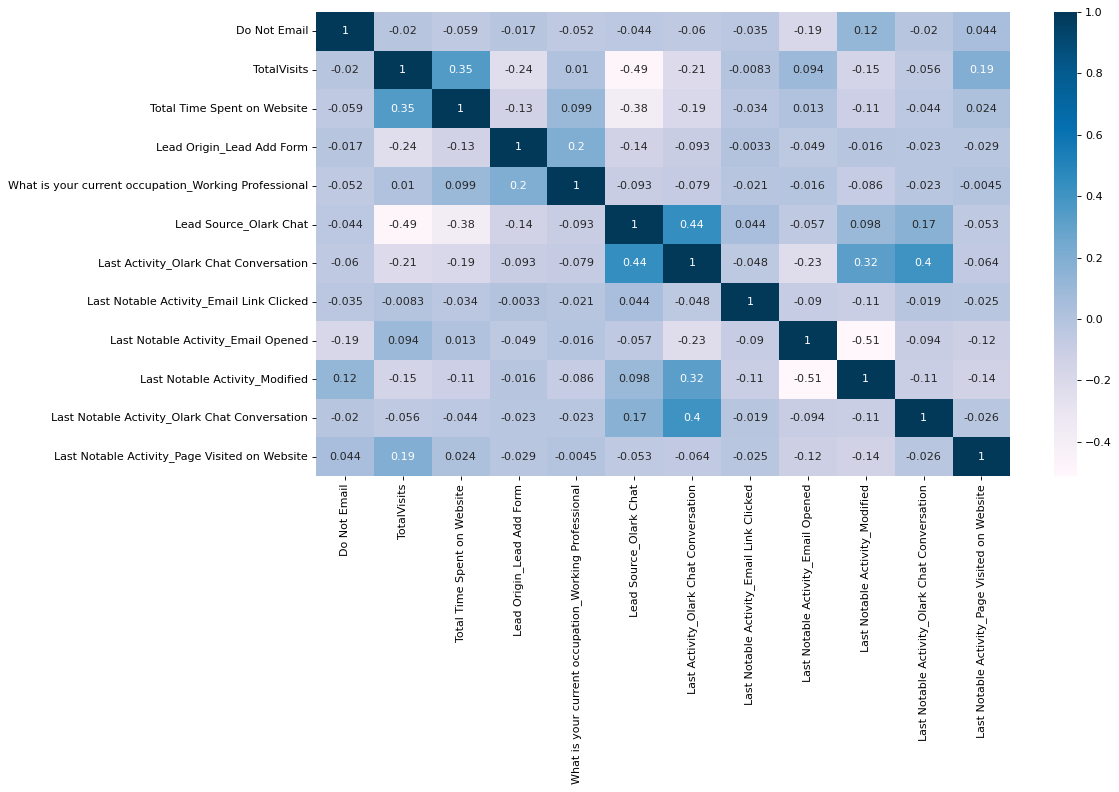

In [134]:
# Checking & Verifying & Validating Correlations Again:
plt.figure(figsize=(15,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')

corr = X_train[col].corr()
sns.heatmap(corr, annot=True, cmap="PuBu")

plt.tight_layout()
plt.show()

# 6. Model Prediction :

In [135]:
# Predicting the probabilities (of the "converted" value being 1) on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06520241, 0.06946513, 0.01946568, 0.26224772, 0.41712438,
       0.0634377 , 0.0634377 , 0.12751397, 0.27733557, 0.33601558])

In [136]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect Id'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id
0          0        0.065202         5493
1          0        0.069465         8064
2          0        0.019466         4716
3          0        0.262248         9117
4          1        0.417124         2402

Remarks : To test/ evalute our predictive model, lets create an col "Pridicted" based on the Converted probability (ie, "Converted_Prob"), such that if Converted_Prob >0.5 (ie, more than 50% chances for convertion), "Predicted" will be 1, else 0. By this way we can classify  it as 'Not Converted'or 'Converted' 

In [137]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted
0          0        0.065202         5493          0
1          0        0.069465         8064          0
2          0        0.019466         4716          0
3          0        0.262248         9117          0
4          1        0.417124         2402          0

# 8. Model Evaluation

In [138]:
# Checking the confusion metrics
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3460  449]
 [ 752 1659]]


In [139]:
# checking the overall accuracy
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8099683544303797


In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6880962256325176

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8851368636479918

In [143]:
# Calculate false postive rate - predicting non conversion when leads have converted
print(FP/ float(TN+FP))

0.11486313635200819


In [144]:
# True positive predictive value 
print (TP / float(TP+FP))

0.7870018975332068


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8214624881291548


Remarks : Our model seems to have high accuracy (80.99%), high sensitivity (68.80%) and high specificity (88.5%). We will indentify the customers which might convert, with the help of ROC Curves in the next section.

# 8. Plotting ROC Curve

In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [277]:
# TPR = True Positive Rate --> Out of actually 'converted' cases, how many is the model correctly predicting as 'converted'
# FPR = False Positive Rate --> Out of actual 'non-convert' cases, how many is the model incorrectly predicting as 'converted'

# Thus we would want as high TPR as possible & as low FPR as possible. Ideal model would have TPR = 1 and FPR = 0.
# ROC Curve shows the trade-off between TPR and FPR.

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

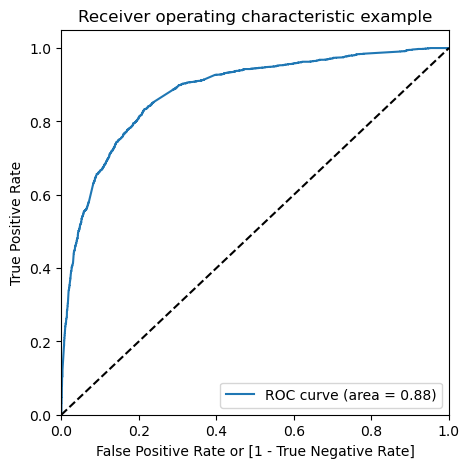

In [148]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Remarks : The area under the curve of the ROC is nearly equal to 1 (precisely 0.88) which is quite good. so we seem to have a good model. Lets also check the sensitivity and specificity tradeoff to find the optimal cut off point.

# 9. Finding Optimal Cutoff Point

In [149]:
# create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.065202         5493          0    1    0    0    0    0   
1          0        0.069465         8064          0    1    0    0    0    0   
2          0        0.019466         4716          0    1    0    0    0    0   
3          0        0.262248         9117          0    1    1    1    0    0   
4          1        0.417124         2402          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_p = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_p.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_p)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.601108  0.962671  0.378102
0.2   0.2  0.758386  0.907092  0.666667
0.3   0.3  0.800316  0.840315  0.775646
0.4   0.4  0.809335  0.772294  0.832182
0.5   0.5  0.809968  0.688096  0.885137
0.6   0.6  0.807753  0.628785  0.918138
0.7   0.7  0.783228  0.507673  0.953185
0.8   0.8  0.757120  0.411033  0.970581
0.9   0.9  0.709177  0.257155  0.987976


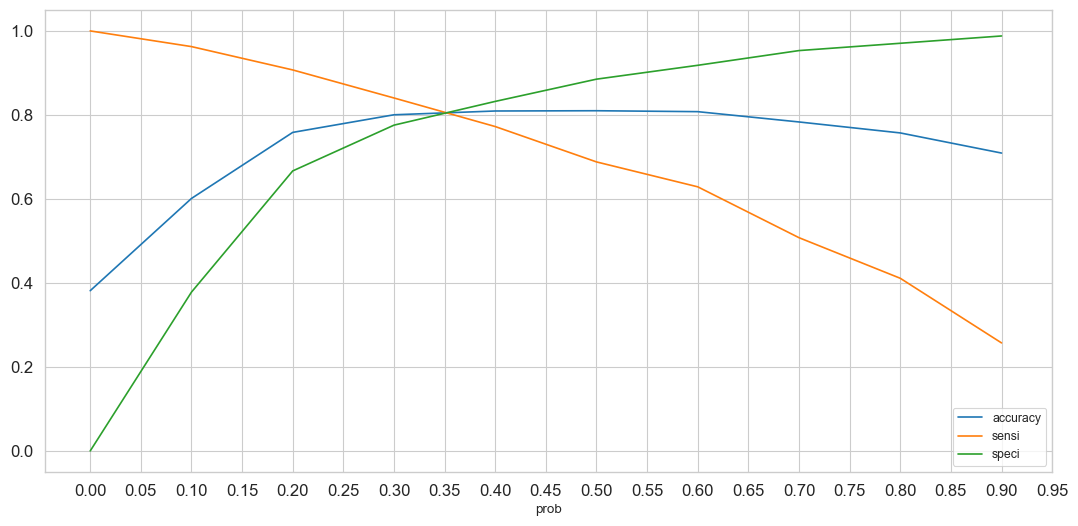

In [151]:
#Plotting Graph
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_p.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(13,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

In [152]:
# Evaluating the model with optimal probability cutoff as 0.35
y_train_pred_final['final_Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.35 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.065202         5493          0    1    0    0    0    0   
1          0        0.069465         8064          0    1    0    0    0    0   
2          0        0.019466         4716          0    1    0    0    0    0   
3          0        0.262248         9117          0    1    1    1    0    0   
4          1        0.417124         2402          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                1

In [153]:
# Now let us calculate the lead score

y_train_pred_final['lead_score_board'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect Id','final_Predicted','lead_score_board']].head(10)

Converted  Converted_Prob  Prospect Id  final_Predicted  lead_score_board
0          0        0.065202         5493                0                 7
1          0        0.069465         8064                0                 7
2          0        0.019466         4716                0                 2
3          0        0.262248         9117                0                26
4          1        0.417124         2402                1                42
5          0        0.063438         1796                0                 6
6          0        0.063438         1120                0                 6
7          0        0.127514          253                0                13
8          0        0.277336         1491                0                28
9          1        0.336016         2004                0                34

In [154]:
#Lets check  accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.8039556962025316


In [155]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3137,  772],
       [ 467, 1944]], dtype=int64)

In [156]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
# Sensitivity 
TP / float(TP+FN)

0.8063044379925343

In [158]:
# specificity
TN / float(TN+FP)

0.8025070350473267

In [159]:
# false postive rate
print(FP/ float(TN+FP))

0.19749296495267332


In [160]:
# True Positive predictive value 
print (TP / float(TP+FP))

0.7157584683357879


In [161]:
# True Negative predictive value
print (TN / float(TN+ FN))

0.8704217536071032


Accuracy : 88.32%
Sensitivity : 86.63%
Specificity : 88.74%

In [163]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[3137,  772],
       [ 467, 1944]], dtype=int64)

In [164]:
# Precision:
pre= TP/ (TP + FP)
pre

0.7157584683357879

In [165]:
# Recall:
rec=TP/ (TP + FN)
rec

0.8063044379925343

In [166]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final["Converted"],y_train_pred_final["final_Predicted"]))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      3909
           1       0.72      0.81      0.76      2411

    accuracy                           0.80      6320
   macro avg       0.79      0.80      0.80      6320
weighted avg       0.81      0.80      0.81      6320



In [167]:
F1 = 2*(pre*rec)/(pre+rec)
F1

0.7583382094792276

In [168]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

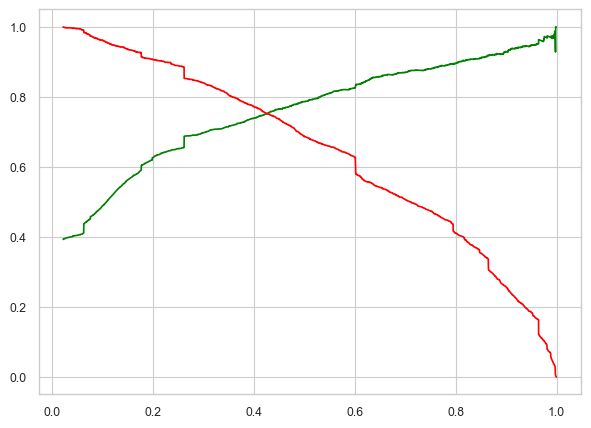

In [169]:
plt.figure(figsize=[7,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making Predictions on test set

In [170]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])


In [171]:
X_test = X_test[col]
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4664             0       0.0000                     0.000000   
5394             0       0.2500                     0.072183   
1595             0       0.2500                     0.515405   
2111             0       0.4375                     0.229754   
9182             0       0.0000                     0.000000   

      Lead Origin_Lead Add Form  \
4664                          0   
5394                          0   
1595                          0   
2111                          0   
9182                          0   

      What is your current occupation_Working Professional  \
4664                                                  0      
5394                                                  0      
1595                                                  1      
2111                                                  0      
9182                                                  0      

      Lead Source_Olark Chat  Last Activity_Olark Chat Conversation  \
4664                       1                                      0   
5394                       1                                      0   
1595                       0                                      0   
2111                       0                                      0   
9182                       1                                      0   

      Last Notable Activity_Email Link Clicked  \
4664                                         0   
5394                                         0   
1595                                         0   
2111                                         0   
9182                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
4664                                   1                               0   
5394                                   0                               1   
1595                                   0                               1   
2111                                   1                               0   
9182                                   0                               1   

      Last Notable Activity_Olark Chat Conversation  \
4664                                              0   
5394                                              0   
1595                                              0   
2111                                              0   
9182                                              0   

      Last Notable Activity_Page Visited on Website  
4664                                              0  
5394                                              0  
1595                                              0  
2111                                              0  
9182                                              0

In [172]:
print(y_test.shape)
print(X_test.shape)

(2709,)
(2709, 12)


In [173]:
#Add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [174]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4664    0.262248
5394    0.285282
1595    0.902417
2111    0.278676
9182    0.177383
1055    0.374284
541     0.127508
446     0.981078
3728    0.058476
4249    0.017360
dtype: float64

In [175]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4664  0.262248
5394  0.285282
1595  0.902417
2111  0.278676
9182  0.177383

In [176]:
# Converting y_test to dataframe
y_test_dataframe = pd.DataFrame(y_test)

In [177]:
y_test_dataframe['Prospect Id'] = y_test_dataframe.index

In [178]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_dataframe.reset_index(drop=True, inplace=True)

In [179]:
# Appending y_test_dataframe and y_test_pred
y_pred_final = pd.concat([y_test_dataframe, y_test_pred],axis=1)

In [180]:
# Checking the head() of the final dataframe
y_pred_final.head()

Converted  Prospect Id         0
0          0         4664  0.262248
1          0         5394  0.285282
2          1         1595  0.902417
3          0         2111  0.278676
4          0         9182  0.177383

In [181]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [182]:
y_pred_final['Lead_Score_Board'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

Converted  Prospect Id  Converted_Prob  Lead_Score_Board
0          0         4664        0.262248                26
1          0         5394        0.285282                29
2          1         1595        0.902417                90
3          0         2111        0.278676                28
4          0         9182        0.177383                18

In [183]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect Id','Converted','Converted_Prob', 'Lead_Score_Board'], axis=1)

In [185]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect Id  Converted  Converted_Prob  Lead_Score_Board
0         4664          0        0.262248                26
1         5394          0        0.285282                29
2         1595          1        0.902417                90
3         2111          0        0.278676                28
4         9182          0        0.177383                18

In [186]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

Prospect Id  Converted  Converted_Prob  Lead_Score_Board  final_predicted
0         4664          0        0.262248                26                0
1         5394          0        0.285282                29                0
2         1595          1        0.902417                90                1
3         2111          0        0.278676                28                0
4         9182          0        0.177383                18                0

In [187]:
## Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8036175710594315

In [188]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1306,  337],
       [ 195,  871]], dtype=int64)

In [189]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [190]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8170731707317073

In [191]:
# Let us calculate specificity
TN / float(TN+FP)

0.7948874010955569

Accuracy: 80.36%

Sensitivity: 81.70%

Specificity: 79.48%

In [193]:
# precision
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7210264900662252

In [194]:
#recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8170731707317073

In [195]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.20511259890444308


In [196]:
# True Positive predictive value 
print (TP / float(TP+FP))

0.7210264900662252


In [197]:
# True Negative predictive value
print (TN / float(TN+ FN))

0.8700866089273818


In [198]:
print(classification_report(y_pred_final["Converted"],y_pred_final["final_predicted"]))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1643
           1       0.72      0.82      0.77      1066

    accuracy                           0.80      2709
   macro avg       0.80      0.81      0.80      2709
weighted avg       0.81      0.80      0.81      2709



In [199]:
# Precision and Recall metrics for the test set

# precision
print('Precision - ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('Recall -',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision -  0.7210264900662252
Recall - 0.8170731707317073


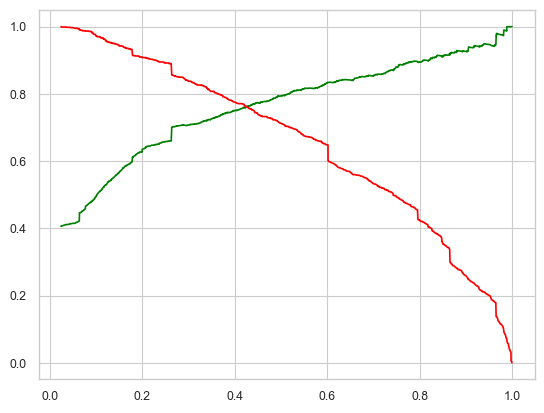

In [200]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Remarks : To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs


In [201]:
from sklearn.model_selection import cross_val_score

X=X_train[:200]
y=y_train[:200]

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.65 0.75 0.75 0.75 0.75 0.8  0.8  0.85 0.85 0.9 ]
0.7849999999999999


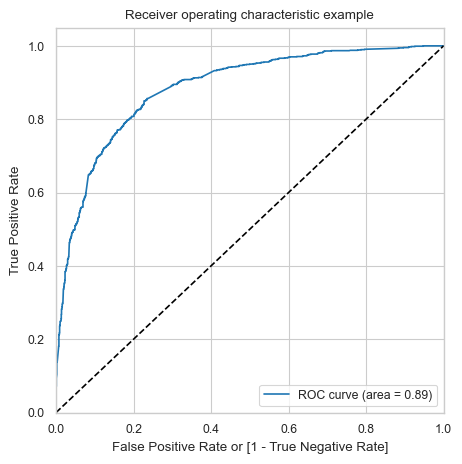

In [202]:
# ROC Curve 
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )
draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

# Calculating the LEAD SCORE

In [203]:
#This needs to be calculated for all the leads from the original dataset (train + test)
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

Prospect Id  Converted  Converted_Prob  Lead_Score_Board  final_predicted
0         4664          0        0.262248                26                0
1         5394          0        0.285282                29                0
2         1595          1        0.902417                90                1
3         2111          0        0.278676                28                0
4         9182          0        0.177383                18                0

In [204]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.065202         5493          0    1    0    0    0    0   
1          0        0.069465         8064          0    1    0    0    0    0   
2          0        0.019466         4716          0    1    0    0    0    0   
3          0        0.262248         9117          0    1    1    1    0    0   
4          1        0.417124         2402          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  lead_score_board  
0    0    0    0    0    0                0                 7  
1    0    0    0    0    0                0                 7  
2    0    0    0    0    0                0                 2  
3    0    0    0    0    0                0                26  
4    0    0    0    0    0                1                42

In [205]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Prospect Id','Converted','Converted_Prob','final_Predicted']]
leads_train_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted
0         5493          0        0.065202                0
1         8064          0        0.069465                0
2         4716          0        0.019466                0
3         9117          0        0.262248                0
4         2402          1        0.417124                1

In [206]:
leads_test_pred = leads_test_pred[['Prospect Id','Converted','Converted_Prob','final_predicted']]
leads_test_pred.head()

Prospect Id  Converted  Converted_Prob  final_predicted
0         4664          0        0.262248                0
1         5394          0        0.285282                0
2         1595          1        0.902417                1
3         2111          0        0.278676                0
4         9182          0        0.177383                0

In [207]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted  final_predicted
0         5493          0        0.065202              0.0              NaN
1         8064          0        0.069465              0.0              NaN
2         4716          0        0.019466              0.0              NaN
3         9117          0        0.262248              0.0              NaN
4         2402          1        0.417124              1.0              NaN

In [208]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted  final_predicted  \
0         5493          0        0.065202              0.0              NaN   
1         8064          0        0.069465              0.0              NaN   
2         4716          0        0.019466              0.0              NaN   
3         9117          0        0.262248              0.0              NaN   
4         2402          1        0.417124              1.0              NaN   

   Lead_Score  
0           7  
1           7  
2           2  
3          26  
4          42

In [209]:
# Inspecting the dataframe shape
lead_full_pred.shape

(9029, 6)

In [210]:
# Making the Prospect ID column as index

lead_full_pred = lead_full_pred.set_index('Prospect Id').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Converted_Prob  final_Predicted  final_predicted  \
Prospect Id                                                                
0                    0        0.177383              NaN              0.0   
1                    0        0.312022              0.0              NaN   
2                    1        0.670507              1.0              NaN   
3                    0        0.089764              NaN              0.0   
4                    1        0.500628              1.0              NaN   

             Lead_Score  
Prospect Id              
0                    18  
1                    31  
2                    67  
3                     9  
4                    50

# Determining HOT LEADS with 81% accuracy more than 80% Conversion Rate

In [211]:
# Determining hot leads with more than 80% Conversion Rate
hot_leads = lead_full_pred[lead_full_pred["Lead_Score"]>80]
hot_leads.head()

Converted  Converted_Prob  final_Predicted  final_predicted  \
Prospect Id                                                                
37                   1        0.829137              1.0              NaN   
64                   1        0.962763              NaN              1.0   
76                   1        0.847543              NaN              1.0   
77                   1        0.977352              NaN              1.0   
79                   1        0.996222              NaN              1.0   

             Lead_Score  
Prospect Id              
37                   83  
64                   96  
76                   85  
77                   98  
79                  100

In [212]:
# Hot Leads Shape
hot_leads.shape

(1589, 5)

# Determining Feature Importance

In [213]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.59
TotalVisits                                             1.15
Total Time Spent on Website                             4.55
Lead Origin_Lead Add Form                               4.35
What is your current occupation_Working Professional    2.59
Lead Source_Olark Chat                                  1.46
Last Activity_Olark Chat Conversation                  -1.16
Last Notable Activity_Email Link Clicked               -1.80
Last Notable Activity_Email Opened                     -1.45
Last Notable Activity_Modified                         -1.95
Last Notable Activity_Olark Chat Conversation          -1.74
Last Notable Activity_Page Visited on Website          -1.97
dtype: float64

In [214]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending = False)

Total Time Spent on Website                            100.00
Lead Origin_Lead Add Form                               95.79
What is your current occupation_Working Professional    57.02
Lead Source_Olark Chat                                  32.21
TotalVisits                                             25.30
Last Activity_Olark Chat Conversation                  -25.47
Last Notable Activity_Email Opened                     -31.80
Do Not Email                                           -34.90
Last Notable Activity_Olark Chat Conversation          -38.36
Last Notable Activity_Email Link Clicked               -39.64
Last Notable Activity_Modified                         -42.80
Last Notable Activity_Page Visited on Website          -43.38
dtype: float64

# Ranking features based on importance

In [215]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            11
TotalVisits                                              9
Total Time Spent on Website                              7
Lead Origin_Lead Add Form                               10
What is your current occupation_Working Professional     0
Lead Source_Olark Chat                                   8
Last Activity_Olark Chat Conversation                    6
Last Notable Activity_Email Link Clicked                 1
Last Notable Activity_Email Opened                       5
Last Notable Activity_Modified                           4
Last Notable Activity_Olark Chat Conversation            3
Last Notable Activity_Page Visited on Website            2
dtype: int64

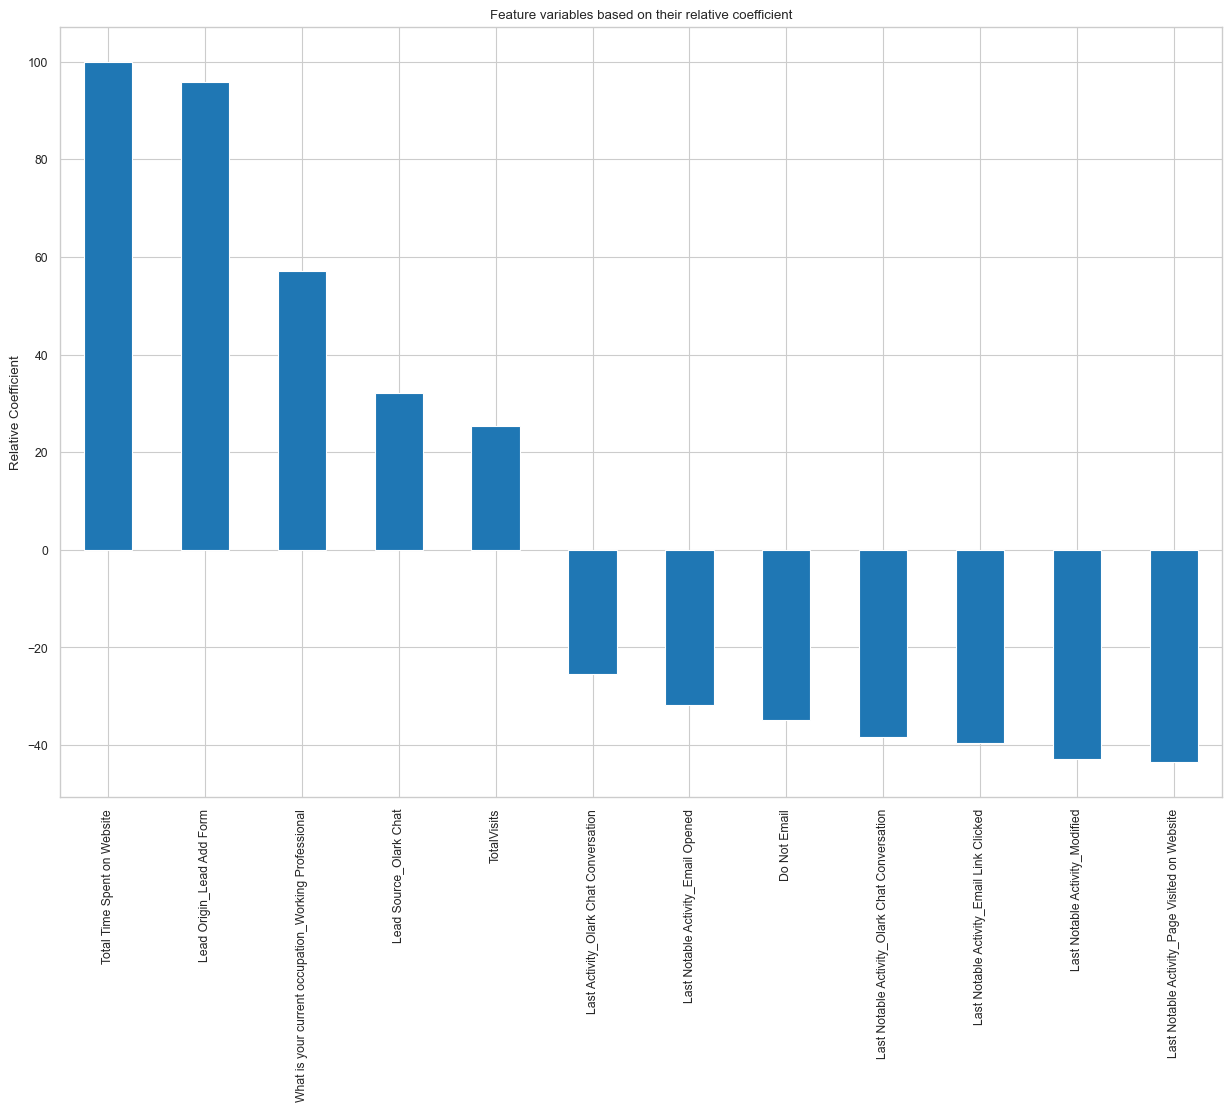

In [216]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (15,10))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [217]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
2                        Total Time Spent on Website 100.00
3                          Lead Origin_Lead Add Form  95.79
4  What is your current occupation_Working Profes...  57.02

In [218]:
# Selecting Least 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).tail(3)

index      0
7        Last Notable Activity_Email Link Clicked -39.64
9                  Last Notable Activity_Modified -42.80
11  Last Notable Activity_Page Visited on Website -43.38

RESULTS
Final Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.88, which is very good. Let us compare the values obtained for Train & Test Set:

Train Data:
Accuracy: 80.99%
Sensitivity: 68.80%
Specificity: 88.51%


Test Data:
Accuracy: 80.36%
Sensitivity: 81.70%
Specificity: 79.48%

# CONCLUSION & RECOMMENDATIONS
After trying several models, we finally chose a model no 5 with the following characteristics:
All variables have p-value < 0.05, showing significant features contributing towards Lead Conversion.

All the features have very low VIF values (<3), means hardly there is any muliticollinearity among the features. This can be seen from the heat map.

The ROC curve has a value of 0.88, which is very good!

The overall accuracy of Around 89% at a probability threshold of 0.34 on the test dataset is also very acceptable.

For Train Dataset

Accuracy: 80.99%
Sensitivity: 68.80%
Specificity: 88.51%
False postive rate - predicting the lead conversion when the lead does not convert: 0.1148
Precision/Positive predictive value: 78.70%
Negative predictive value: 82.14%
ROC : 0.95
F1 Score : 0.76

For Test Dataset

Accuracy: 80.36%
Sensitivity: 81.70%
Specificity: 79.48%
pecificity: 79.48%
Precision -  0.7210264900662252
Recall - 0.8170731707317073
FP = 0.20511259890444308
TP = 0.7210264900662252
TN = 0.7210264900662252
ROC : 0.88
The optimal threshold for the model is 0.35 which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric.

High sensitivity ensures that most of the leads who are likely to convert are correctly predicted, while high specificity ensures that most of the leads who are not likely to convert are correctly predicted.

THANK YOU
Submitted by Neelanjan Roy | Akshay Roy | Sameer Kumar : DSC 54 batch
Neelanjan Roy: roy.neelanjan@gmail.com
Akshay Roy :  royakshay46@gmail.com
Sameer Kumar: rsameer.kumar17@gmail.com
